In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
pip install --upgrade xlrd;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
import matplotlib
from pathlib import Path
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error ,r2_score

In [ ]:
mnemocis = ["DEPTH","DTCO","GR","IA","NPHI","PEF","Vsh","RHOB","RT","Vp"]
mnemocis_POJ = ["DEPTH","DTCO","GR","NPHI","RHOB","PEF","RT"]

#Pojuca

## 7-MPG-40D-BA

**NÚCLEO**

In [ ]:
columnas = ["MD","Poro_Core_%","Gran_Density_g/cc","Kh_mD"]

In [ ]:
core_POJ = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-MPG-40D-BA/PETROFISICA7MGP0040DBA-7MGP40DBA (1).xls"
core_POJ = pd.read_excel(core_POJ)

In [ ]:
core_POJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SIGLA POCO           629 non-null    object        
 1   PREFIXO              629 non-null    object        
 2   DATA_INICIO POÇO     629 non-null    datetime64[ns]
 3   TIPO AMOSTRA         629 non-null    object        
 4   DIRECAO AMOSTRA      629 non-null    object        
 5   TESTEMUNHO           629 non-null    int64         
 6   PROF.(m)             629 non-null    float64       
 7   POROSIDADE %         629 non-null    float64       
 8    DENSIDADE           629 non-null    float64       
 9   PERMEAB. LONG. (mD)  614 non-null    float64       
 10  PRESSAO CONF. (psi)  628 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 54.2+ KB


In [ ]:
core_POJ = core_POJ.drop(["SIGLA POCO", "PREFIXO", "DATA_INICIO POÇO", "TIPO AMOSTRA", "TESTEMUNHO","PRESSAO CONF. (psi)"],axis=1)

In [ ]:
core_POJ_V = core_POJ[core_POJ["DIRECAO AMOSTRA"]=="VV1"]
core_POJ = core_POJ[core_POJ["DIRECAO AMOSTRA"]=="VH1"]

In [ ]:
core_POJ = core_POJ.rename(columns={"PROF.(m)":columnas[0],"POROSIDADE %":columnas[1]," DENSIDADE":columnas[2],"PERMEAB. LONG. (mD)":columnas[3]})

In [ ]:
core_POJ.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,477.000000,477.000000,477.000000,465.000000
mean,2234.095639,13.049266,2.695870,9.809204
std,299.132833,5.404446,0.033904,38.557502
min,1913.000000,1.400000,2.600000,0.010000
25%,1963.120000,8.650000,2.670000,0.010000
50%,2014.400000,13.000000,2.690000,0.200000
75%,2563.280000,17.000000,2.710000,2.500000
max,2618.950000,28.800000,2.790000,282.100000


In [ ]:
core_7MGP = core_POJ
core_UNK = core_POJ[(2511.7<=core_POJ["MD"]) & (core_POJ["MD"]<=2618.95)]
core_POJ = core_POJ[(1913<=core_POJ["MD"]) & (core_POJ["MD"]<=2026.34)]

In [ ]:
core_POJ["MD"]=core_POJ["MD"]+8

<ipython-input-14-a8a94479e173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_POJ["MD"]=core_POJ["MD"]+8


In [ ]:
core_UNK["MD"]=core_UNK["MD"]+8

<ipython-input-15-d7c59a5ca173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_UNK["MD"]=core_UNK["MD"]+8


In [ ]:
core_POJ.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,267.000000,267.000000,267.000000,258.000000
mean,1978.638127,13.804120,2.701873,3.738992
std,32.917798,4.952822,0.036298,12.700601
min,1921.000000,2.060000,2.620000,0.010000
25%,1952.760000,9.395000,2.680000,0.072500
50%,1976.130000,14.100000,2.700000,0.600000
75%,2008.725000,18.200000,2.725000,3.000000
max,2034.340000,22.300000,2.790000,156.600000


In [ ]:
core_POJ["LogKh_mD"] = np.log10(core_POJ["Kh_mD"])

<ipython-input-17-ec1edf25a3e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_POJ["LogKh_mD"] = np.log10(core_POJ["Kh_mD"])


In [ ]:
core_POJ.drop(core_POJ.index[core_POJ.LogKh_mD==-2],axis=0,inplace=True)
core_POJ.drop(core_POJ.index[core_POJ.LogKh_mD==-1],axis=0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
core_POJ

,DIRECAO AMOSTRA,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD,LogKh_mD
18,VH1,1989.35,4.48,2.67,NaN,NaN
19,VH1,1986.03,4.55,2.66,NaN,NaN
22,VH1,1987.03,4.87,2.65,NaN,NaN
24,VH1,1987.35,4.91,2.68,NaN,NaN
30,VH1,1991.00,5.20,2.69,0.8,-0.096910
...,...,...,...,...,...,...
597,VH1,1972.61,21.60,2.68,6.5,0.812913
598,VH1,2019.08,21.70,2.69,2.3,0.361728
600,VH1,2020.15,21.90,2.70,2.6,0.414973
602,VH1,2018.75,22.00,2.70,6.4,0.806180


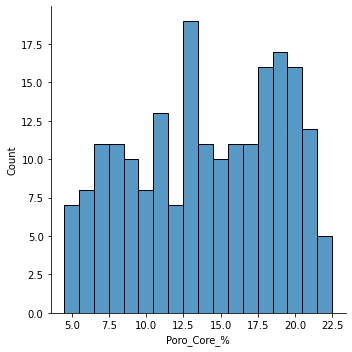

In [ ]:
sns.displot(core_POJ['Poro_Core_%'],binwidth=1);

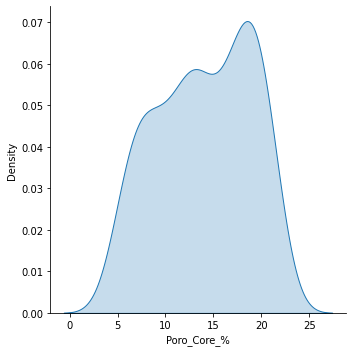

In [ ]:
sns.displot(core_POJ['Poro_Core_%'],kind="kde",fill=True);

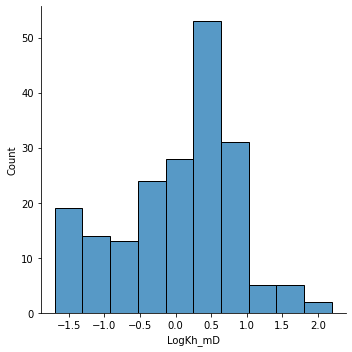

In [ ]:
sns.displot(core_POJ["LogKh_mD"]);

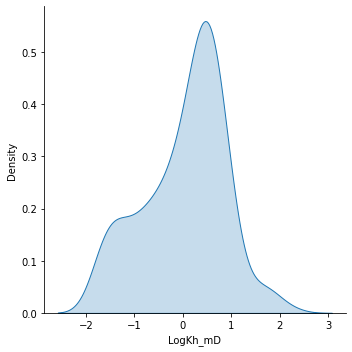

In [ ]:
sns.displot(core_POJ["LogKh_mD"],kind="kde",fill=True);

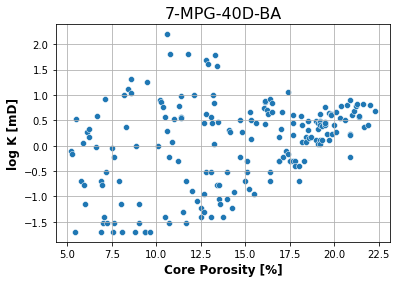

In [ ]:
p = sns.scatterplot(x=core_POJ['Poro_Core_%'],y=core_POJ['LogKh_mD'])
p.set_title("7-MPG-40D-BA",fontsize=16)
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.grid();

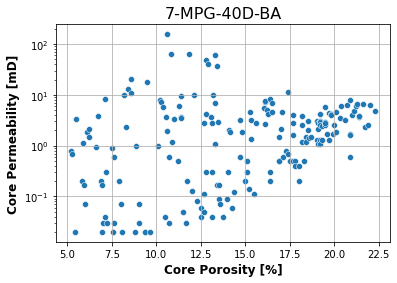

In [ ]:
p = sns.scatterplot(x=core_POJ['Poro_Core_%'],y=core_POJ['Kh_mD'])
p.set_title("7-MPG-40D-BA",fontsize=16)
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("Core Permeability [mD]", fontsize=12,fontweight="bold")
p.semilogy()
p.grid();

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

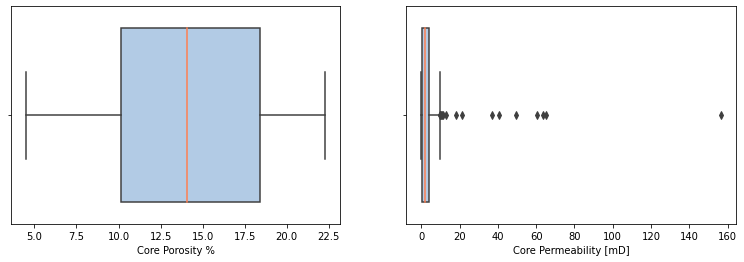

In [ ]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.boxplot(core_POJ["Poro_Core_%"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %");

plt.subplot(1,2,2)
sns.boxplot(core_POJ["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Permeability [mD]");

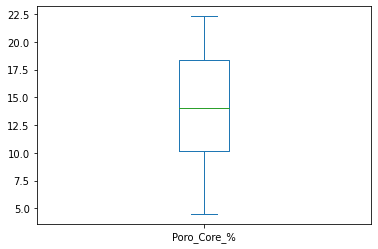

In [ ]:
core_POJ["Poro_Core_%"].plot(kind="box")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


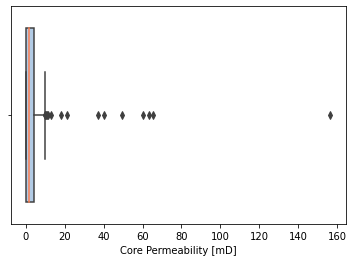

In [ ]:
sns.boxplot(core_POJ["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Permeability [mD]");

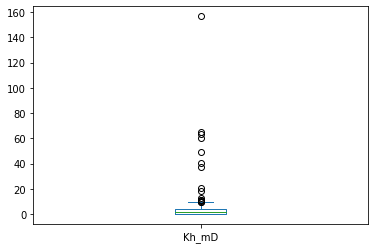

In [ ]:
core_POJ["Kh_mD"].plot(kind="box")

**REGISTROS**

In [ ]:
registro_7MPG ="/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-MPG-40D-BA/7-MGP-40D-BA Log.xlsx"
registro_7MPG = pd.read_excel(registro_7MPG)

In [ ]:
registro_7MPG.describe()

,MD,GR,BS,CALI,RT,RHOB,NPHI,DPHI,PEF,SPHI,DT,DRHO
count,9672.000000,9672.000000,9672.0,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000
mean,2153.793014,73.341317,8.5,9.021152,11.728251,2.474870,0.220499,0.137503,6.243132,0.201662,84.860721,-0.055395
std,425.532843,25.396297,0.0,0.510900,69.914324,0.144520,0.092854,0.084514,15.154034,0.063214,15.515030,0.194740
min,1416.862793,12.379324,8.5,8.451496,0.341679,1.677306,-0.001127,-0.011250,-198.829590,-0.214738,41.679688,-1.096153
25%,1785.327881,53.693716,8.5,8.679987,2.431111,2.448168,0.147473,0.086483,2.929788,0.162310,75.644531,-0.015935
50%,2153.792969,75.814468,8.5,8.924423,3.578729,2.519493,0.212224,0.111408,3.675248,0.193712,81.152344,-0.009455
75%,2522.258057,95.310562,8.5,9.164434,7.952973,2.562115,0.295700,0.153118,4.219269,0.244392,91.958008,-0.001194
max,2890.723145,146.611450,8.5,13.404070,1950.000000,2.729238,0.539343,0.603915,977.787598,0.431792,181.152344,0.169815


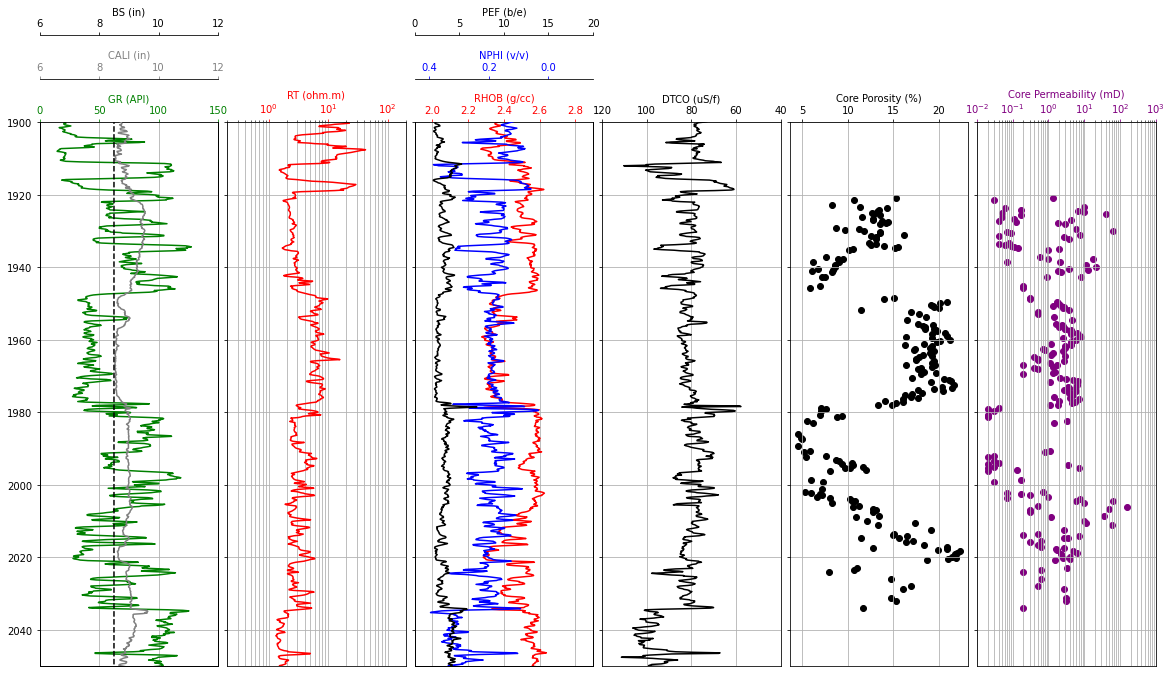

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax6 = ax5.twiny()
ax7 = ax5.twiny()
ax8 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax9 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax10 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7MPG,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro_7MPG,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_7MPG,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RT","MD",data=registro_7MPG,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RT (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RHOB","MD",data=registro_7MPG,color="red")
ax5.set_xlim(1.9,2.9)
ax5.grid(which="minor")
ax5.set_xlabel("RHOB (g/cc)",color="red")
ax5.tick_params(axis="x",colors="red")

ax6.plot("NPHI","MD",data=registro_7MPG,color="blue")
ax6.set_xlim(0.45,-0.15)
ax6.set_xlabel("NPHI (v/v)",color="blue")
ax6.tick_params(axis="x",colors="blue")

ax7.plot("PEF","MD",data=registro_7MPG,color="black")
ax7.set_xlim(0,20)
ax7.set_xlabel("PEF (b/e)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("DT","MD",data=registro_7MPG,color="black")
ax8.set_xlim(120,40)
ax8.set_xlabel("DTCO (uS/f)",color="black")
ax8.tick_params(axis="x",colors="black")

ax9.scatter("Poro_Core_%","MD",data=core_POJ,color="black")
ax9.set_xlabel("Core Porosity (%)",color="black")
ax9.tick_params(axis="x",colors="black")

ax10.scatter("Kh_mD","MD",data=core_POJ,color="purple")
ax10.semilogx()
ax10.set_xlim(0.01,1000)
ax10.grid(which="minor")
ax10.set_xlabel("Core Permeability (mD)",color="purple")
ax10.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(2050,1900)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==5:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==6 or i==2:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
corrMatrix = registro_7MPG.drop(["MD","BS","DPHI","SPHI","DRHO"],1).corr()
corrMatrix

<ipython-input-33-24e8202691c3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  corrMatrix = registro_7MPG.drop(["MD","BS","DPHI","SPHI","DRHO"],1).corr()


,GR,CALI,RT,RHOB,NPHI,PEF,DT
GR,1.000000,0.328620,-0.153719,0.524084,0.582073,-0.118572,0.327493
CALI,0.328620,1.000000,-0.103885,0.062593,0.423046,0.006259,0.269994
RT,-0.153719,-0.103885,1.000000,-0.134897,-0.128281,-0.028612,-0.046932
RHOB,0.524084,0.062593,-0.134897,1.000000,-0.214279,-0.511740,-0.399948
NPHI,0.582073,0.423046,-0.128281,-0.214279,1.000000,0.318187,0.780745
PEF,-0.118572,0.006259,-0.028612,-0.511740,0.318187,1.000000,0.381620
DT,0.327493,0.269994,-0.046932,-0.399948,0.780745,0.381620,1.000000


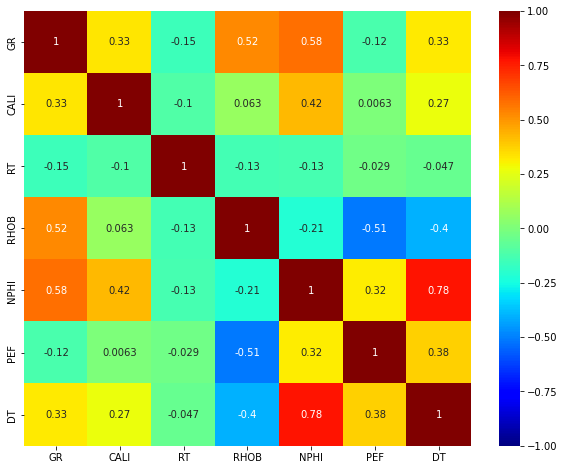

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix,cmap="jet",vmin=-1,vmax=1,annot=True,annot_kws={"fontsize":10})

# Agua Grande

## 7-RO-14-BA

**NÚCLEO**

In [ ]:
core_7RO_AG = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Petrofisicos/Agua Grande/7-RO-14-BA/Horizontal/Core 1.txt"
core_7RO_AG = np.loadtxt(core_7RO_AG,skiprows=1)
core_7RO_AG[core_7RO_AG==-999.25]=np.nan
core_7RO_AG[core_7RO_AG==-9.9925]=np.nan
core_7RO_AG = pd.DataFrame(core_7RO_AG,columns=["MD","Poro_Core_%","Kh_mD"])

In [ ]:
core_7RO_AG["Poro_Core_%"]=core_7RO_AG["Poro_Core_%"]*100

In [ ]:
core_7RO_AG.describe()

,MD,Poro_Core_%,Kh_mD
count,27.000000,26.000000,23.000000
mean,1012.360741,20.723077,104.936522
std,2.599205,3.408027,86.386437
min,1008.290000,9.800000,0.700000
25%,1010.250000,19.725000,47.200000
50%,1012.510000,22.050000,84.000000
75%,1014.290000,22.975000,132.100000
max,1016.920000,24.000000,309.100000


In [ ]:
core_7RO_AG["LogKh_mD"] = np.log10(core_7RO_AG["Kh_mD"])

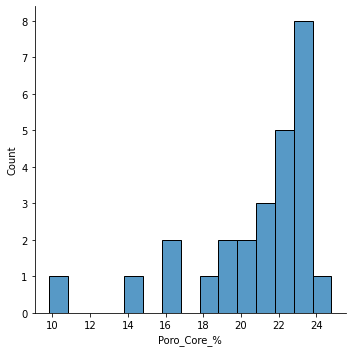

In [ ]:
sns.displot(core_7RO_AG['Poro_Core_%'],binwidth=1);

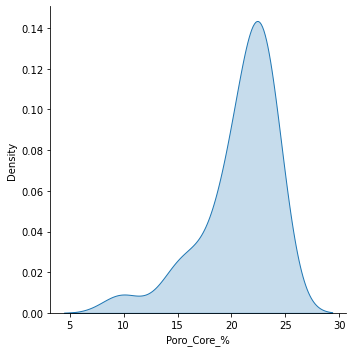

In [ ]:
sns.displot(core_7RO_AG['Poro_Core_%'],kind="kde",fill=True);

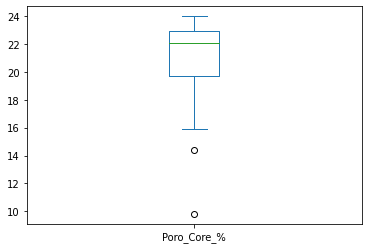

In [ ]:
core_7RO_AG["Poro_Core_%"].plot(kind="box");

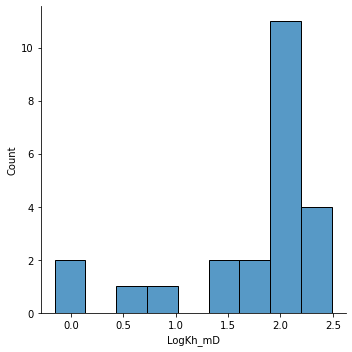

In [ ]:
sns.displot(core_7RO_AG["LogKh_mD"]);

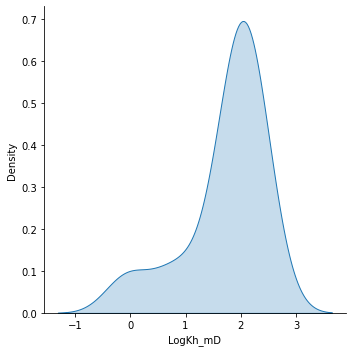

In [ ]:
sns.displot(core_7RO_AG["LogKh_mD"],kind="kde",fill=True);

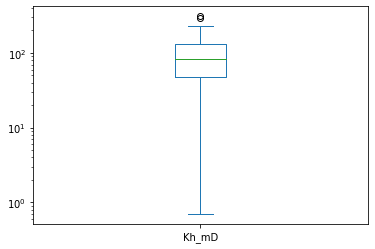

In [ ]:
core_7RO_AG["Kh_mD"].plot(kind="box")
plt.semilogy();

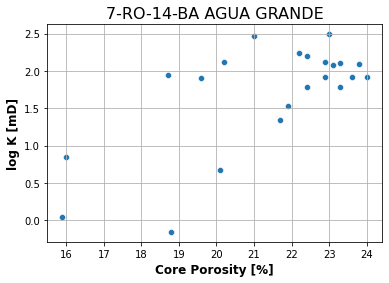

In [ ]:
p = sns.scatterplot(x=core_7RO_AG['Poro_Core_%'],y=core_7RO_AG['LogKh_mD'])
p.set_title("7-RO-14-BA AGUA GRANDE",fontsize=16)
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.grid();

**REGISTROS**

In [ ]:
registro_7RO_AG = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Well Logs/Agua Grande Fm/7-RO-14-BA"
registro_7RO_AG = np.loadtxt(registro_7RO_AG,skiprows=36)
registro_7RO_AG[registro_7RO_AG==-999.25]=np.nan

In [ ]:
registro_7RO_AG = pd.DataFrame(registro_7RO_AG,columns=mnemocis)

In [ ]:
not_NaN = registro_7RO_AG['GR'].notnull().values
registro_7RO_AG = registro_7RO_AG[not_NaN]

In [ ]:
registro_7RO_AG.describe()

,DEPTH,DTCO,GR,IA,NPHI,PEF,Vsh,RHOB,RT,Vp
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1043.830000,84.645199,64.150620,8634.282011,0.178074,3.661446,0.427671,2.379047,21.141852,3634.944546
std,22.011361,8.507485,23.938669,780.645107,0.058845,0.732219,0.159591,0.110593,8.637068,342.915101
min,1006.080000,70.667656,21.467552,6695.165039,0.084168,2.609509,0.143117,1.914838,4.605346,2860.557861
25%,1024.955000,78.855867,42.255065,8245.734375,0.141604,3.199467,0.281700,2.316231,15.928835,3464.796326
50%,1043.830000,82.882793,76.218452,8645.050293,0.158934,3.663459,0.508123,2.392288,18.694430,3677.482300
75%,1062.705000,87.973568,81.722239,9170.316406,0.192998,3.825631,0.544815,2.448913,27.171948,3865.280457
max,1081.580000,106.552643,93.622330,10550.541016,0.306711,5.987460,0.624149,2.601940,38.539192,4313.146973


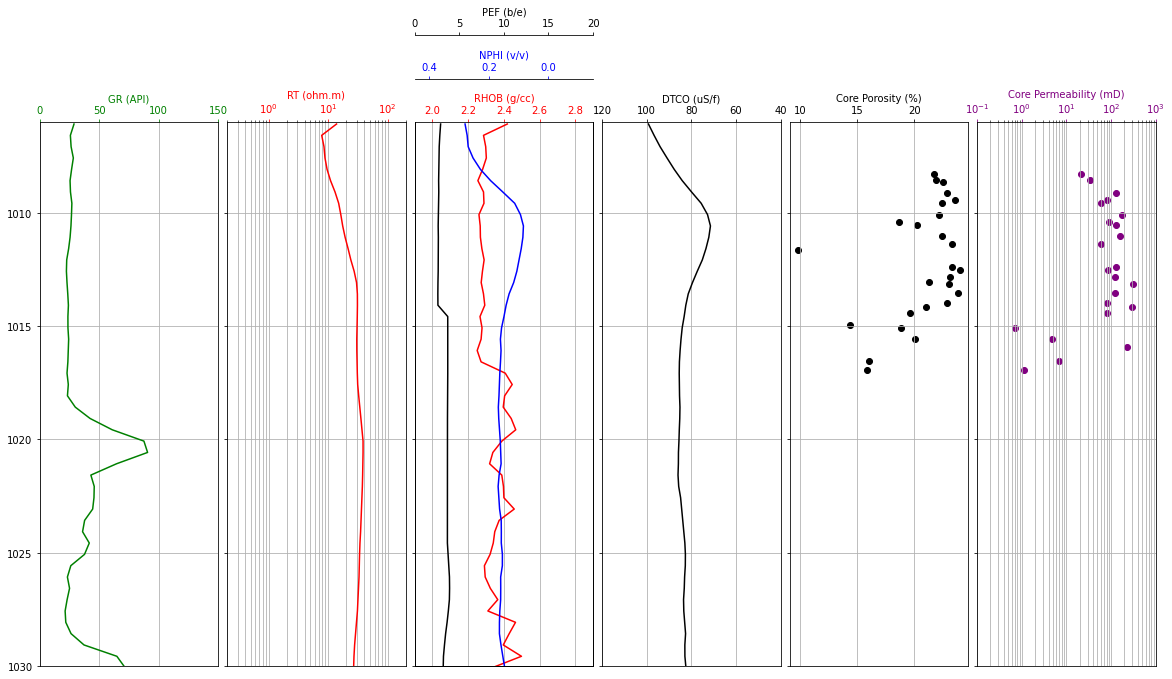

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax4 = ax3.twiny()
ax5 = ax3.twiny()
ax6 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax8 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","DEPTH",data=registro_7RO_AG,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("RT","DEPTH",data=registro_7RO_AG,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RT (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("RHOB","DEPTH",data=registro_7RO_AG,color="red")
ax3.set_xlim(1.9,2.9)
ax3.grid(which="minor")
ax3.set_xlabel("RHOB (g/cc)",color="red")
ax3.tick_params(axis="x",colors="red")

ax4.plot("NPHI","DEPTH",data=registro_7RO_AG,color="blue")
ax4.set_xlim(0.45,-0.15)
ax4.set_xlabel("NPHI (v/v)",color="blue")
ax4.tick_params(axis="x",colors="blue")

ax5.plot("PEF","DEPTH",data=registro_7RO_AG,color="black")
ax5.set_xlim(0,20)
ax5.set_xlabel("PEF (b/e)",color="black")
ax5.tick_params(axis="x",colors="black")

ax6.plot("DTCO","DEPTH",data=registro_7RO_AG,color="black")
ax6.set_xlim(120,40)
ax6.set_xlabel("DTCO (uS/f)",color="black")
ax6.tick_params(axis="x",colors="black")

ax7.scatter("Poro_Core_%","MD",data=core_7RO_AG,color="black")
ax7.set_xlabel("Core Porosity (%)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.scatter("Kh_mD","MD",data=core_7RO_AG,color="purple")
ax8.semilogx()
ax8.set_xlim(0.1,1000)
ax8.grid(which="minor")
ax8.set_xlabel("Core Permeability (mD)",color="purple")
ax8.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1030,1006)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==3:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==4:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
registro7RO_AG = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-RO-14-BA/7-RO-14-BA Log.Txt"
registro7RO_AG = np.loadtxt(registro7RO_AG,skiprows=5)

In [ ]:
registro7RO_AG = pd.DataFrame(registro7RO_AG,columns=["MD","GR","RHOB","CNSS","RILD","SP","SN"])

In [ ]:
registro7RO_AG["CNSS"] = registro7RO_AG["CNSS"]/100

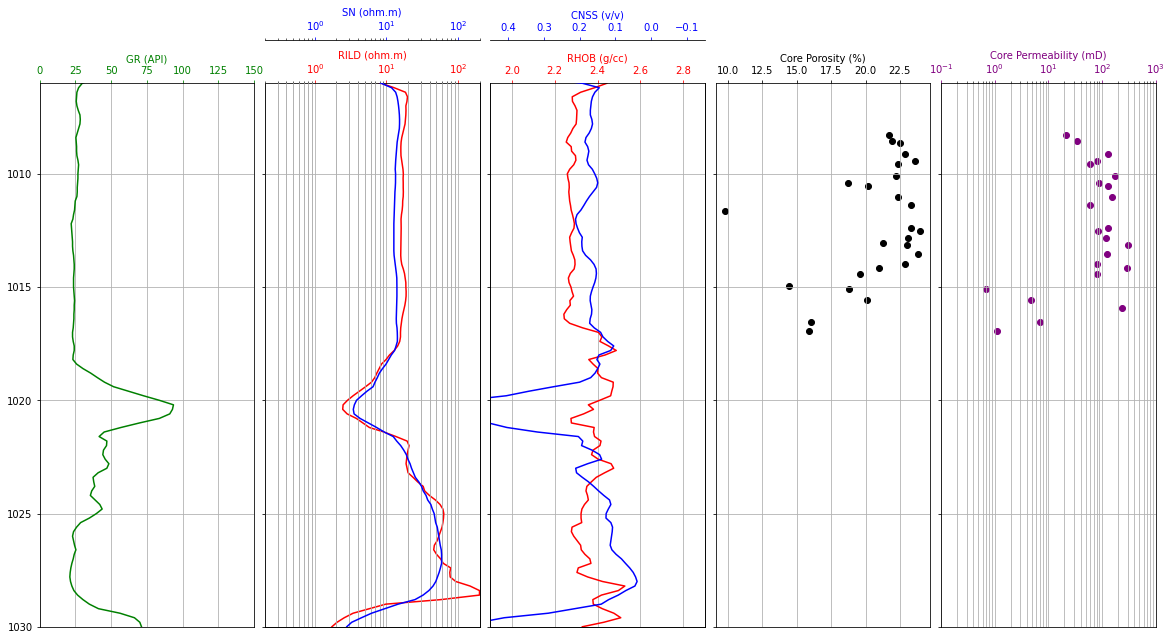

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,10),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro7RO_AG,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("RILD","MD",data=registro7RO_AG,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RILD (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("SN","MD",data=registro7RO_AG,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("SN (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro7RO_AG,color="red")
ax4.set_xlim(1.9,2.9)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro7RO_AG,color="blue")
ax5.set_xlim(0.45,-0.15)
ax5.set_xlabel("CNSS (v/v)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.scatter("Poro_Core_%","MD",data=core_7RO_AG,color="black")
ax6.set_xlabel("Core Porosity (%)",color="black")
ax6.tick_params(axis="x",colors="black")

ax7.scatter("Kh_mD","MD",data=core_7RO_AG,color="purple")
ax7.semilogx()
ax7.set_xlim(0.1,1000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1030,1006)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

## 7-JND-3D-BA

In [ ]:
core_7JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Petrofisicos/Agua Grande/7-JND-3D-BA/PETROFISICA7JND0003DBA-7JND3DBA.xls"
core_7JND = pd.read_excel(core_7JND)
core_7JND = core_7JND.drop(["SIGLA POCO", "PREFIXO", "DATA_INICIO POÇO", "TIPO AMOSTRA", "TESTEMUNHO","PRESSAO CONF. (psi)"],axis=1)
core_7JND = core_7JND.rename(columns={"PROF.(m)":columnas[0],"POROSIDADE %":columnas[1]," DENSIDADE":columnas[2],"PERMEAB. LONG. (mD)":columnas[3]})

In [ ]:
core_7JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    104 non-null    object 
 1   MD                 104 non-null    float64
 2   Poro_Core_%        104 non-null    float64
 3   Gran_Density_g/cc  104 non-null    float64
 4   Kh_mD              104 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [ ]:
core_7JND_V = core_7JND[core_7JND["DIRECAO AMOSTRA"]=="IV1"]
core_7JND = core_7JND[core_7JND["DIRECAO AMOSTRA"]=="IH1"]

In [ ]:
core_7JND.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,81.000000,81.00000,81.000000,81.000000
mean,948.093827,21.67037,2.677654,1053.504198
std,8.378911,6.96980,0.024611,970.329991
min,934.600000,3.30000,2.630000,0.010000
25%,940.850000,14.90000,2.660000,9.000000
50%,947.300000,25.60000,2.670000,1131.500000
75%,955.800000,27.10000,2.690000,1840.000000
max,962.450000,29.90000,2.750000,3770.800000


In [ ]:
core_7JND["LogKh_mD"] = np.log10(core_7JND["Kh_mD"])

In [ ]:
core_7JND.drop(core_7JND.index[core_7JND.LogKh_mD==-2],axis=0,inplace=True)

In [ ]:
core_7JND = core_7JND.sort_values(by=["MD"])

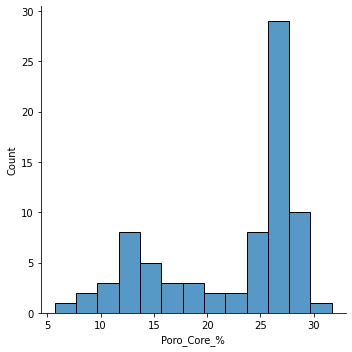

In [ ]:
sns.displot(core_7JND['Poro_Core_%'],binwidth=2);

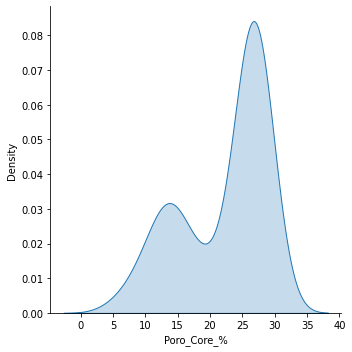

In [ ]:
sns.displot(core_7JND['Poro_Core_%'],kind="kde",fill=True);

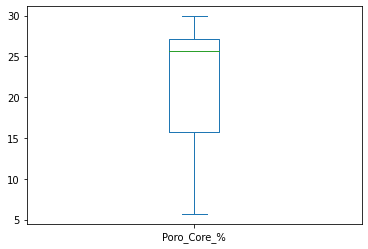

In [ ]:
core_7JND["Poro_Core_%"].plot(kind="box");

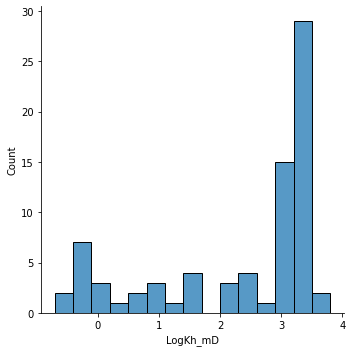

In [ ]:
sns.displot(core_7JND["LogKh_mD"],binwidth=0.3);

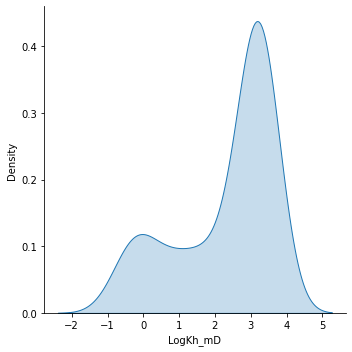

In [ ]:
sns.displot(core_7JND["LogKh_mD"],kind="kde",fill=True);

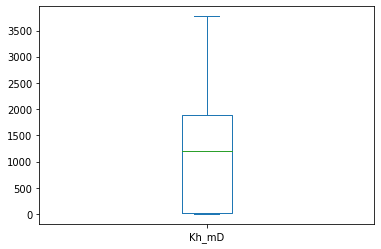

In [ ]:
core_7JND['Kh_mD'].plot(kind="box");

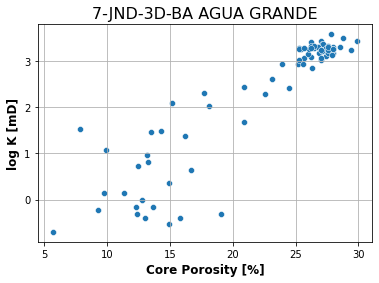

In [ ]:
p = sns.scatterplot(x=core_7JND['Poro_Core_%'],y=core_7JND['LogKh_mD'])
p.set_title("7-JND-3D-BA AGUA GRANDE",fontsize=16)
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.grid();

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

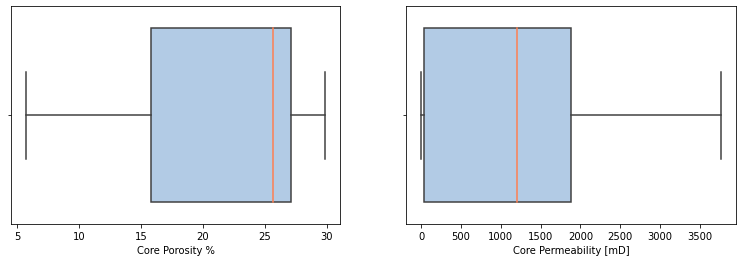

In [ ]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.boxplot(core_7JND["Poro_Core_%"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %");

plt.subplot(1,2,2)
sns.boxplot(core_7JND["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Permeability [mD]");

In [ ]:
X = core_7JND["Poro_Core_%"].values.reshape(-1,1)
y = core_7JND["LogKh_mD"].values.reshape(-1,1)

In [ ]:
linearRegression=linear_model.LinearRegression()

In [ ]:
linearRegression.fit(X,y)
y_pred=linearRegression.predict(X)

In [ ]:
print('Slope: %.3f'%linearRegression.coef_[0])
print('Intercept: %.3f'%linearRegression.intercept_)

Slope: 0.186
Intercept: -1.824


In [ ]:
error=mean_squared_error(y,y_pred)
print('Error: %.3f'%error)

Error: 0.295


In [ ]:
var=r2_score(y,y_pred)
print('Variance: %.3f'%var)

Variance: 0.834


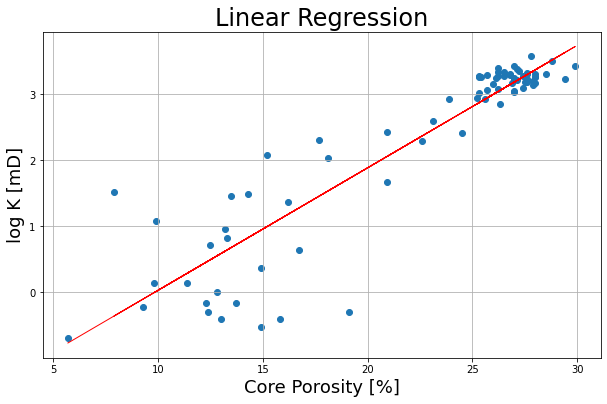

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color="red",linewidth=1)
plt.xlabel("Core Porosity [%]",fontsize=18)
plt.ylabel("log K [mD]",fontsize=18)
plt.title('Linear Regression',fontsize=24)
plt.grid()
plt.show()

**REGISTROS**

In [ ]:
registro_7JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-3D-BA/7-JND-3D-BA Log.xlsx"
registro_7JND = pd.read_excel(registro_7JND)

In [ ]:
registro_7JND.describe()

,MD,GR,CALI,BS,HT90,HT60,HT40,HT30,RHOB,NPHI,PE,DT,DPHI
count,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000
mean,564.849976,78.702189,8.866861,8.428503,48.357821,82.611613,3264.021381,3337.224596,2.064699,0.042419,6.407892,96.235281,-0.128221
std,271.542265,32.588739,18.022025,17.999999,580.587465,621.510954,7387.339273,7870.977565,17.886788,17.850483,18.309839,30.755237,17.847311
min,94.599976,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,329.724976,62.091171,8.750000,8.750000,2.088100,2.049107,2.026358,2.004179,2.308211,0.296645,4.307540,88.400002,0.140476
50%,564.849976,79.831505,9.080894,8.750000,2.768975,2.722621,2.690903,2.669035,2.394331,0.349196,5.203631,101.500000,0.184528
75%,799.974976,97.571838,9.438036,8.750000,5.151887,5.119897,5.157188,5.222931,2.469746,0.407899,8.361354,112.500000,0.234798
max,1035.099976,181.838425,15.509433,8.750000,20000.000000,20000.000000,20000.000000,197365.546875,3.059447,1.105373,23.575212,158.699997,0.544396


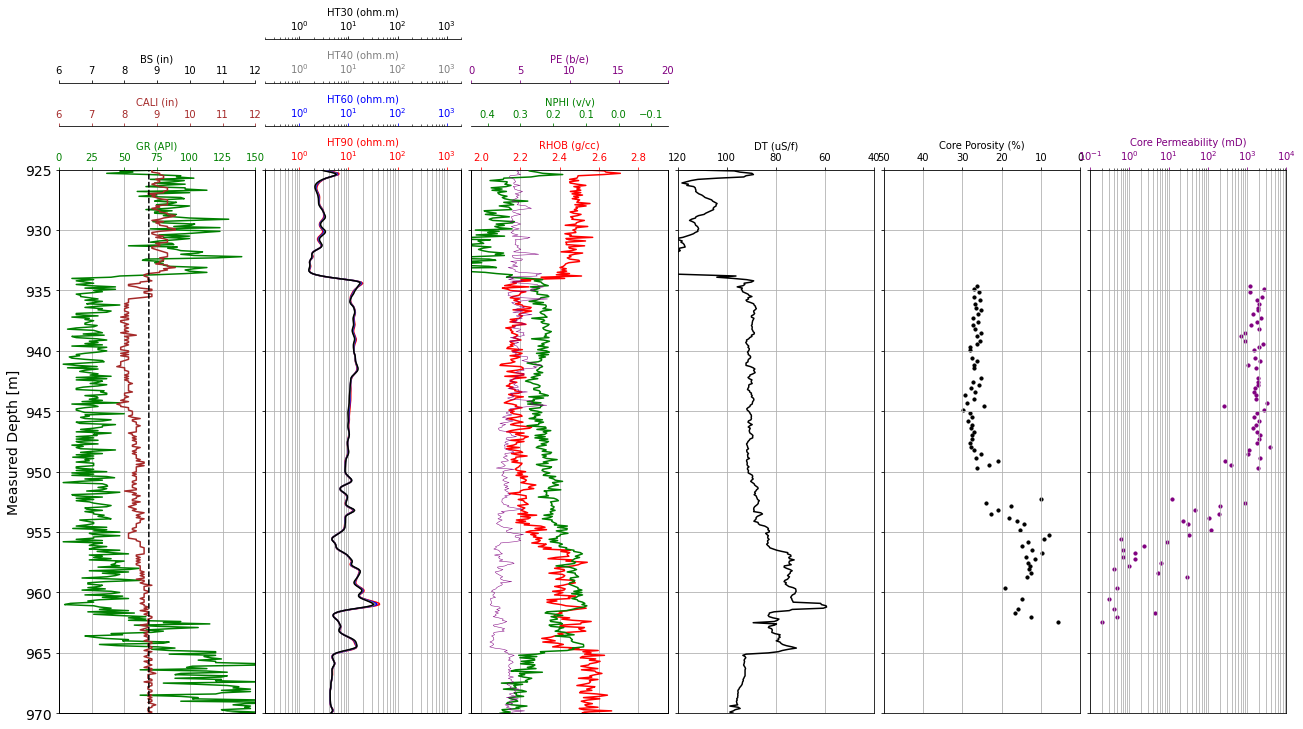

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax7 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("HT90","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("HT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("HT60","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("HT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("HT40","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("HT40 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax7.plot("HT30","MD",data=registro_7JND,color="black")
ax7.set_xlim(0.2,2000)
ax7.semilogx()
ax7.set_xlabel("HT30 (ohm.m)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PE","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

ax11.plot("DT","MD",data=registro_7JND,linestyle="-",color="black")
ax11.set_xlim(120,40)
ax11.set_xlabel("DT (uS/f)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core_%","MD",data=core_7JND,color="black",s=10)
ax12.set_xlabel("Core Porosity (%)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(50,0)

ax13.scatter("Kh_mD","MD",data=core_7JND,color="purple",s=10)
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==8:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==9:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==6:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
corrMatrix = registro_7JND.drop(["MD","HT30","HT60","HT40","BS"],1).corr()
corrMatrix

<ipython-input-80-2715b31cd8e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  corrMatrix = registro_7JND.drop(["MD","HT30","HT60","HT40","BS"],1).corr()


,GR,CALI,HT90,RHOB,NPHI,PE,DT,DPHI
GR,1.000000,0.594234,-0.035786,0.592957,0.590377,0.531033,0.543908,0.589612
CALI,0.594234,1.000000,0.030556,0.999125,0.999240,0.980659,0.649596,0.999239
HT90,-0.035786,0.030556,1.000000,0.031800,0.032651,0.058833,-0.063951,0.032484
RHOB,0.592957,0.999125,0.031800,1.000000,0.999940,0.980434,0.636355,0.999935
NPHI,0.590377,0.999240,0.032651,0.999940,1.000000,0.981760,0.635895,0.999986
PE,0.531033,0.980659,0.058833,0.980434,0.981760,1.000000,0.558629,0.981477
DT,0.543908,0.649596,-0.063951,0.636355,0.635895,0.558629,1.000000,0.636197
DPHI,0.589612,0.999239,0.032484,0.999935,0.999986,0.981477,0.636197,1.000000


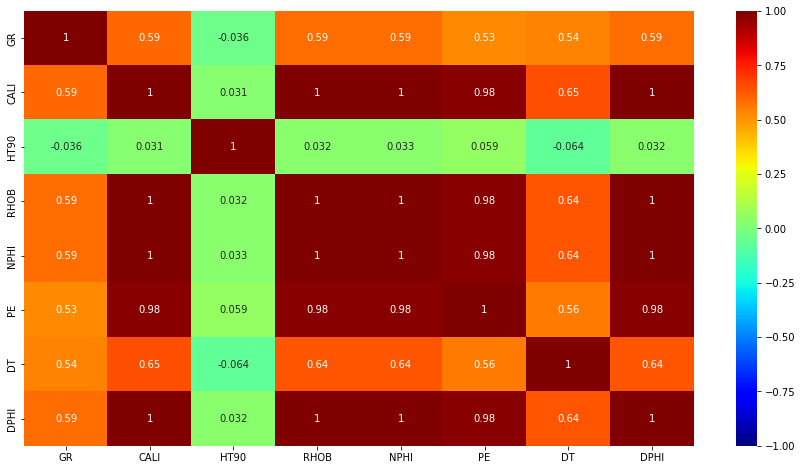

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corrMatrix,cmap="jet",vmin=-1,vmax=1,annot=True,annot_kws={"fontsize":10})

## 7-JND-13D-BA

In [ ]:
core_13JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Petrofisicos/Agua Grande/7-JND-13D-BA/PETROFISICA7JND0013DBA-7JND13DBA.xls"
core_13JND = pd.read_excel(core_13JND)

In [ ]:
core_13JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SIGLA POCO           51 non-null     object        
 1   PREFIXO              51 non-null     object        
 2   DATA_INICIO POÇO     51 non-null     datetime64[ns]
 3   TIPO AMOSTRA         51 non-null     object        
 4   DIRECAO AMOSTRA      51 non-null     object        
 5   TESTEMUNHO           51 non-null     int64         
 6   PROF.(m)             51 non-null     float64       
 7   POROSIDADE %         51 non-null     float64       
 8    DENSIDADE           51 non-null     float64       
 9   PERMEAB. LONG. (mD)  51 non-null     float64       
 10  PRESSAO CONF. (psi)  51 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 4.5+ KB


In [ ]:
core_13JND = core_13JND.drop(["SIGLA POCO", "PREFIXO", "DATA_INICIO POÇO", "TIPO AMOSTRA", "TESTEMUNHO","PRESSAO CONF. (psi)"],axis=1)
core_13JND = core_13JND.rename(columns={"PROF.(m)":columnas[0],"POROSIDADE %":columnas[1]," DENSIDADE":columnas[2],"PERMEAB. LONG. (mD)":columnas[3]})

In [ ]:
core_13JND_V = core_13JND[core_13JND["DIRECAO AMOSTRA"]=="IV1"]
core_13JND = core_13JND[core_13JND["DIRECAO AMOSTRA"]=="IH1"]

In [ ]:
core_13JND.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    39 non-null     object 
 1   MD                 39 non-null     float64
 2   Poro_Core_%        39 non-null     float64
 3   Gran_Density_g/cc  39 non-null     float64
 4   Kh_mD              39 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [ ]:
core_13JND.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,39.000000,39.000000,39.000000,39.000000
mean,990.916667,16.720513,2.628974,180.454359
std,5.111846,5.551490,0.028910,223.908902
min,982.200000,6.800000,2.570000,0.010000
25%,985.725000,12.200000,2.610000,17.000000
50%,991.700000,17.100000,2.630000,65.000000
75%,994.850000,21.150000,2.640000,282.000000
max,998.950000,27.000000,2.720000,848.000000


In [ ]:
core_13JND = core_13JND.sort_values(by=["MD"])

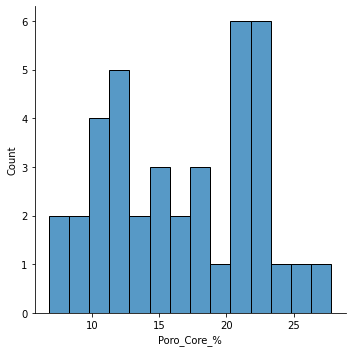

In [ ]:
sns.displot(core_13JND['Poro_Core_%'],binwidth=1.5);

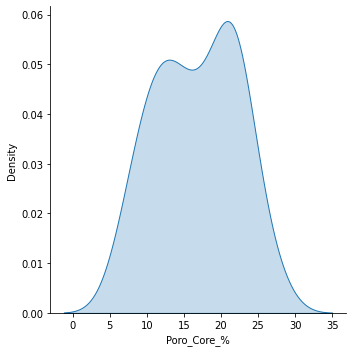

In [ ]:
sns.displot(core_13JND['Poro_Core_%'],kind="kde",fill=True);

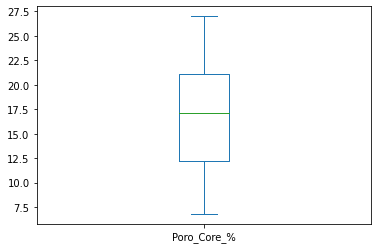

In [ ]:
core_13JND["Poro_Core_%"].plot(kind="box");

In [ ]:
core_13JND["LogKh_mD"] = np.log10(core_13JND["Kh_mD"])

In [ ]:
core_13JND.drop(core_13JND.index[core_13JND.LogKh_mD==-2],axis=0,inplace=True)

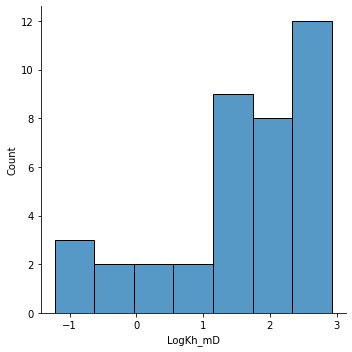

In [ ]:
sns.displot(core_13JND['LogKh_mD']);

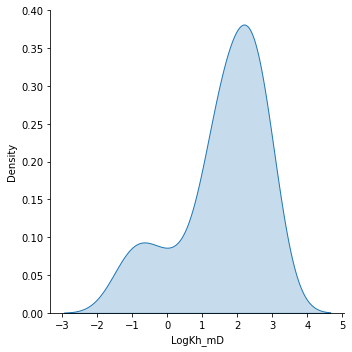

In [ ]:
sns.displot(core_13JND['LogKh_mD'],kind="kde",fill=True);

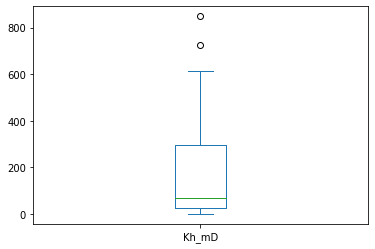

In [ ]:
core_13JND["Kh_mD"].plot(kind="box");

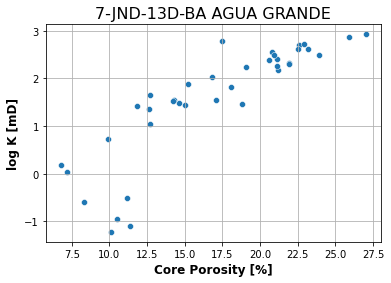

In [ ]:
p = sns.scatterplot(x=core_13JND['Poro_Core_%'],y=core_13JND['LogKh_mD'])
p.set_title("7-JND-13D-BA AGUA GRANDE",fontsize=16)
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.grid();

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

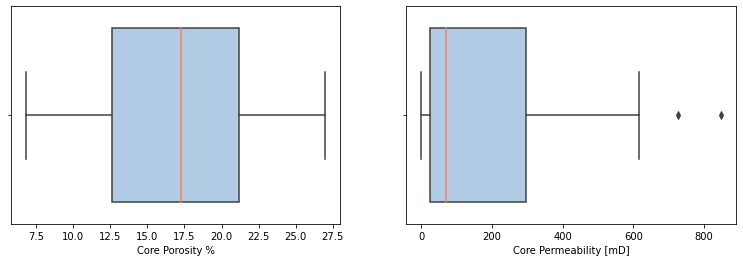

In [ ]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.boxplot(core_13JND["Poro_Core_%"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %");

plt.subplot(1,2,2)
sns.boxplot(core_13JND["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Permeability [mD]");

**REGISTROS**

In [ ]:
registro_13JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-13D-BA/7-JND-13D-BA Log.xlsx"
registro_13JND = pd.read_excel(registro_13JND)

In [ ]:
registro13 = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Well Logs/Agua Grande Fm/7-JND-13D-BA"
registro13 = np.loadtxt(registro13,skiprows=36)
registro13[registro13==-999.25]=np.nan
registro13 = pd.DataFrame(registro13,columns=["MD","DTCO","GR","IA","NPHI","PEF","Vsh","RHOB","RT","Vp"])
not_NaN = registro13['GR'].notnull().values
registro13 = registro13[not_NaN]
registro13 = registro13.drop(["GR","NPHI","PEF","Vsh","RHOB","RT"],axis=1)

In [ ]:
registro_13JND.describe()

,MD,GR,RT,NPHI,BS,PEFZ,RHOZ,DPHZ,AHT90,AHT60,AHT30,AHT20,HCAL
count,6884.000000,6884.000000,6884.000000,6884.000000,6884.00,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000
mean,547.649403,72.625778,2.939280,0.369858,8.75,4.767049,0.859343,1.082256,2.939431,2.914945,2.751827,2.664398,8.618691
std,302.877317,18.555895,1.745923,0.102638,0.00,40.230669,40.014115,23.400068,1.745940,1.749921,1.795154,1.767124,1.360534
min,23.164801,13.561447,0.961574,0.019407,8.75,-999.250000,-999.250000,-1.122105,0.961574,0.981608,1.020170,1.072203,4.319315
25%,285.407097,67.238092,2.054370,0.315640,8.75,4.705415,2.356371,0.118374,2.054370,2.025689,1.918546,1.807346,8.774346
50%,547.649384,74.970943,2.613086,0.363879,8.75,5.500260,2.439945,0.157927,2.613086,2.605451,2.182090,2.122947,8.868247
75%,809.891678,80.430836,3.053295,0.411600,8.75,8.434379,2.507581,0.206801,3.055472,3.031908,2.922029,2.838560,9.045613
max,1072.134033,168.624847,25.107103,0.706097,8.75,10.000000,4.628800,585.941528,25.107103,28.160091,27.897491,27.540642,20.313608


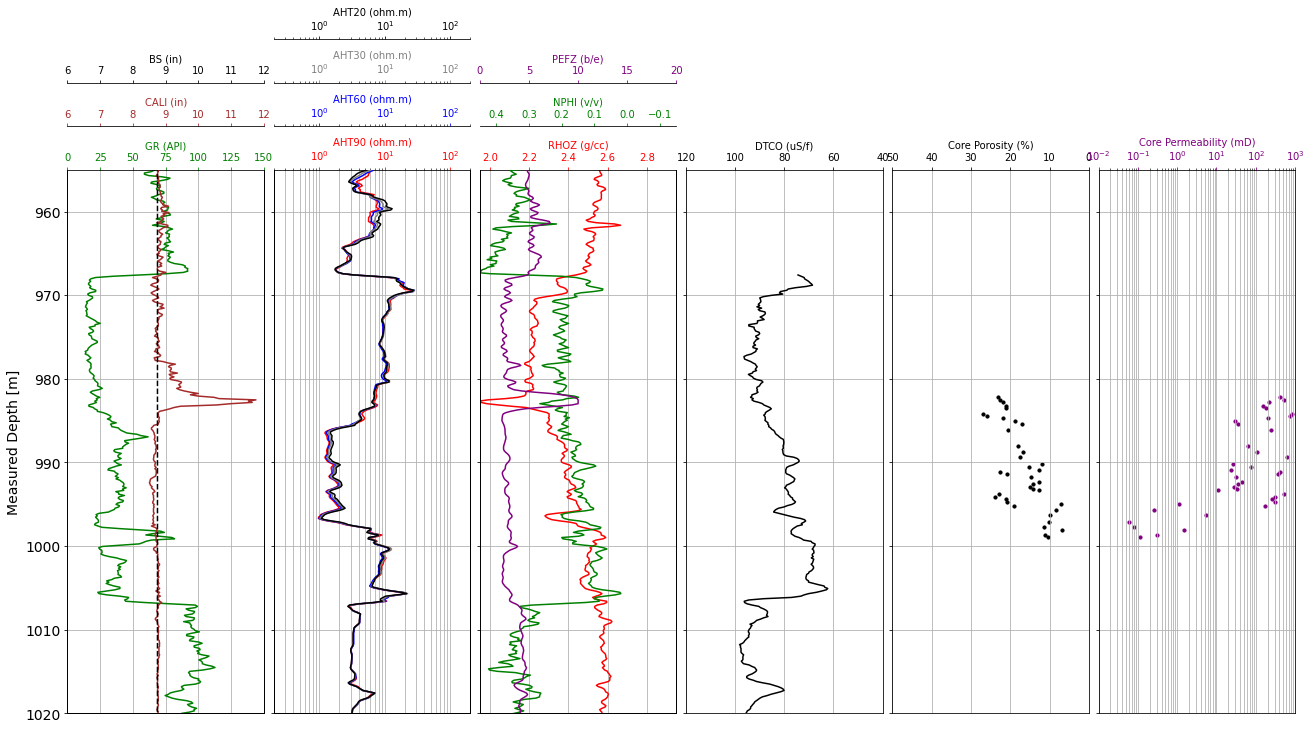

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax7 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("HCAL","MD",data=registro_13JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("AHT90","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("AHT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("AHT60","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.set_xlabel("AHT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("AHT30","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,200)
ax6.semilogx()
ax6.set_xlabel("AHT30 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax7.plot("AHT20","MD",data=registro_13JND,color="black")
ax7.set_xlim(0.2,200)
ax7.semilogx()
ax7.set_xlabel("AHT20 (ohm.m)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("RHOZ","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOZ (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro_13JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEFZ","MD",data=registro_13JND,linestyle="-",color="purple")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEFZ (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

ax11.plot("DTCO","MD",data=registro13,linestyle="-",color="black")
ax11.set_xlim(120,40)
ax11.set_xlabel("DTCO (uS/f)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core_%","MD",data=core_13JND,color="black",s=10)
ax12.set_xlabel("Core Porosity (%)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(50,0)

ax13.scatter("Kh_mD","MD",data=core_13JND,color="purple",s=10)
ax13.semilogx()
ax13.set_xlim(0.01,1000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1020,955)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==8:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==9:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==6:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
corrMatrix = registro_13JND.drop(["MD","BS","AHT60","AHT30","AHT20","RT"],1).corr()
corrMatrix

<ipython-input-103-3c0c4e279a26>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  corrMatrix = registro_13JND.drop(["MD","BS","AHT60","AHT30","AHT20","RT"],1).corr()


,GR,NPHI,PEFZ,RHOZ,DPHZ,AHT90,HCAL
GR,1.000000,-0.179717,-0.216831,-0.207557,0.207557,-0.224052,0.244203
NPHI,-0.179717,1.000000,0.083328,0.044670,-0.044670,-0.431364,-0.473741
PEFZ,-0.216831,0.083328,1.000000,0.998443,-0.998443,-0.035282,0.105293
RHOZ,-0.207557,0.044670,0.998443,1.000000,-1.000000,-0.016501,0.125947
DPHZ,0.207557,-0.044670,-0.998443,-1.000000,1.000000,0.016501,-0.125947
AHT90,-0.224052,-0.431364,-0.035282,-0.016501,0.016501,1.000000,-0.011667
HCAL,0.244203,-0.473741,0.105293,0.125947,-0.125947,-0.011667,1.000000


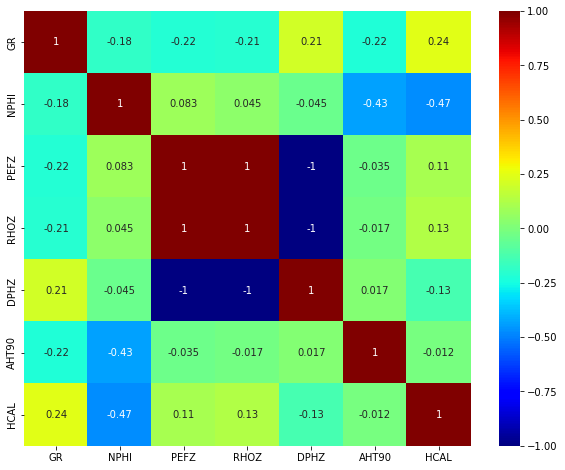

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix,cmap="jet",vmin=-1,vmax=1,annot=True,annot_kws={"fontsize":10})

# Sergi

## 7-RO-14-BA

**NÚCLEO**

In [ ]:
cores_7RO_SER = []
files_7RO_SER = []
Loadtxt_7RO_SER = []
ListaDF_SER = []
Carpeta_7RO_SER = Path("/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Petrofisicos/Sergi/7-RO-14-BA/Horizontal")

for entry in Carpeta_7RO_SER.iterdir():
    cores_7RO_SER.append(entry.name)
cores_7RO_SER.sort()
for i in cores_7RO_SER:
    file = ("/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Petrofisicos/Sergi/7-RO-14-BA/Horizontal/" +i)
    files_7RO_SER.append(file)

for i in files_7RO_SER:
    arreglo = np.loadtxt(i,skiprows=1)
    arreglo[arreglo==-9.9925]=np.nan
    arreglo[arreglo==-999.25]=np.nan
    Loadtxt_7RO_SER.append(arreglo)

for i in Loadtxt_7RO_SER:
    df = pd.DataFrame(i,columns=["MD","Poro_Core_","Kh_mD"])
    ListaDF_SER.append(df)

core_7RO = pd.concat([ListaDF_SER[0],ListaDF_SER[1],ListaDF_SER[2],ListaDF_SER[3],ListaDF_SER[4],ListaDF_SER[5],ListaDF_SER[6]])

In [ ]:
core_7RO["Poro_Core_"] = core_7RO["Poro_Core_"].replace([18.06],0.1806)

In [ ]:
core_7RO["Poro_Core_"]=core_7RO["Poro_Core_"]*100

In [ ]:
core_7RO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 32
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MD          343 non-null    float64
 1   Poro_Core_  335 non-null    float64
 2   Kh_mD       325 non-null    float64
dtypes: float64(3)
memory usage: 10.7 KB


In [ ]:
core_7RO.describe()

,MD,Poro_Core_,Kh_mD
count,343.000000,335.000000,325.000000
mean,1159.299825,0.154527,91.672338
std,46.276703,0.038386,140.829954
min,1091.050000,0.049000,0.100000
25%,1122.525000,0.130000,5.400000
50%,1152.820000,0.152000,30.300000
75%,1199.320000,0.177000,117.900000
max,1260.520000,0.397000,1157.000000


In [ ]:
core_7RO = core_7RO.sort_values(by=["MD"])

In [ ]:
core_7RO["LogKh_mD"] = np.log10(core_7RO["Kh_mD"])

In [ ]:
core_7RO.drop(core_7RO.index[core_7RO.LogKh_mD==-1],axis=0,inplace=True)
core_7RO.drop(core_7RO.index[core_7RO.Poro_Core_==39.7],axis=0,inplace=True)

In [ ]:
core_7RO.rename(columns={"Poro_Core_":"Poro_Core_%"},inplace=True)

In [ ]:
core_7RO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 32
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MD          287 non-null    float64
 1   Poro_Core_  282 non-null    float64
 2   Kh_mD       272 non-null    float64
 3   LogKh_mD    272 non-null    float64
dtypes: float64(4)
memory usage: 11.2 KB


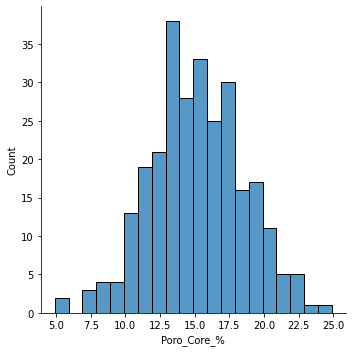

In [ ]:
sns.displot(core_7RO['Poro_Core_%'],binwidth=1);

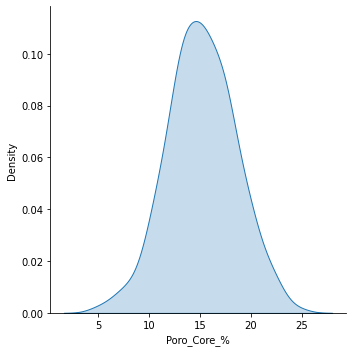

In [ ]:
sns.displot(core_7RO['Poro_Core_%'],kind="kde",fill=True);

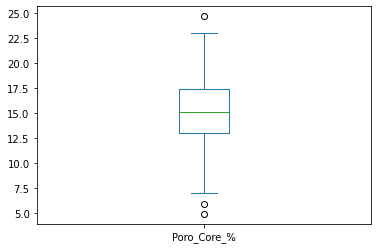

In [ ]:
core_7RO["Poro_Core_%"].plot(kind="box");

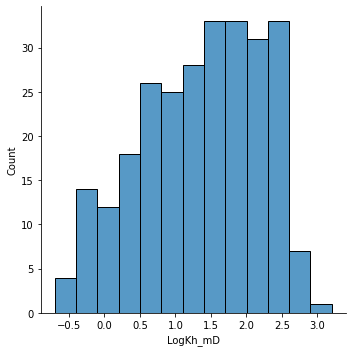

In [ ]:
sns.displot(core_7RO['LogKh_mD'],binwidth=0.3);

In [ ]:
sns.displot(core_7RO['LogKh_mD'],kind="kde",fill=True);

KeyError: ignored

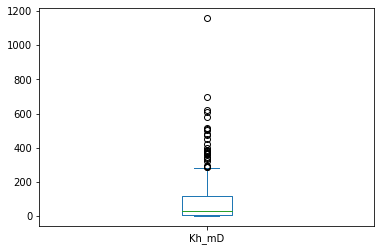

In [ ]:
core_7RO["Kh_mD"].plot(kind="box");

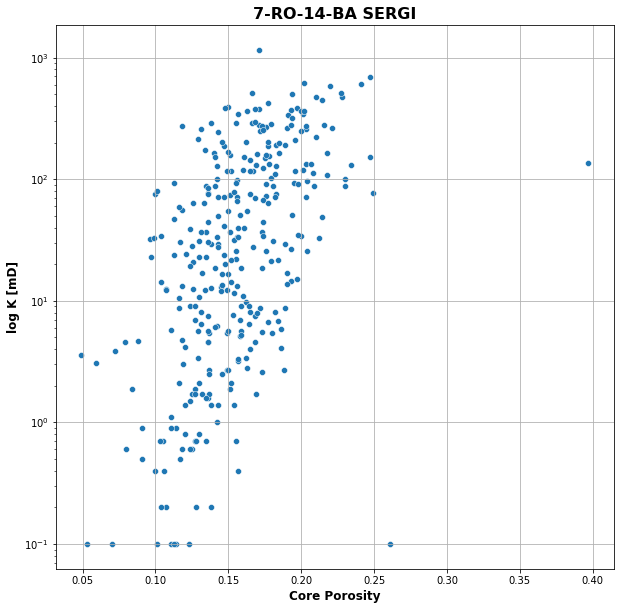

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x=core_7RO['Poro_Core_'],y=core_7RO['Kh_mD'])
p.set_title("7-RO-14-BA SERGI",fontsize=16, fontweight="bold")
p.set_xlabel("Core Porosity", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.semilogy()
p.grid();

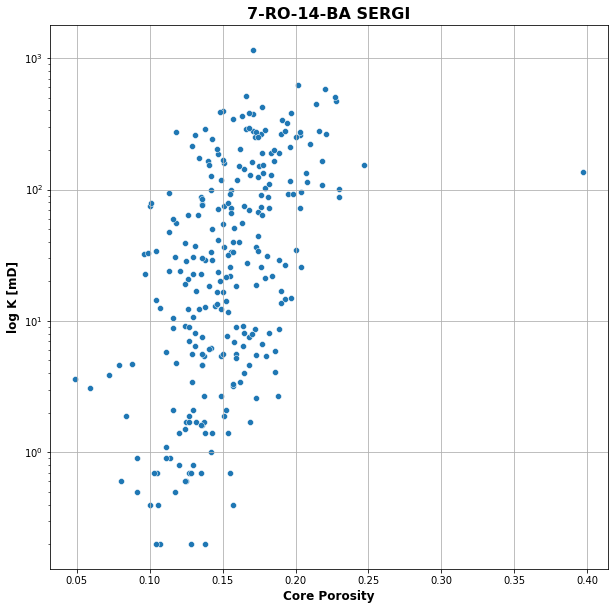

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x=core_7RO['Poro_Core_'],y=core_7RO['Kh_mD'])
p.set_title("7-RO-14-BA SERGI",fontsize=16, fontweight="bold")
p.set_xlabel("Core Porosity", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.semilogy()
p.grid();

**REGISTROS**

In [ ]:
registro7RO_SER = registro7RO_AG[(1085<registro7RO_AG["MD"]) & (registro7RO_AG["MD"]<1273)]

In [ ]:
registro7RO_SER.describe()

,MD,GR,RHOB,CNSS,RILD,SP,SN
count,939.00000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,1179.00000,65.661952,2.425663,0.181557,10.377136,-64.720362,10.567404
std,54.24205,18.612936,0.064849,0.042950,11.953901,15.543457,7.015121
min,1085.20000,38.088000,2.288000,0.079940,1.191000,-102.508000,2.374000
25%,1132.10000,53.370000,2.374000,0.150940,3.605000,-73.668000,5.726350
50%,1179.00000,60.423000,2.423000,0.181030,6.771000,-65.517000,8.621500
75%,1225.90000,73.589000,2.471000,0.214185,12.398000,-53.292000,13.241500
max,1272.80000,201.254000,2.604000,0.314580,87.774000,-30.408000,41.181100


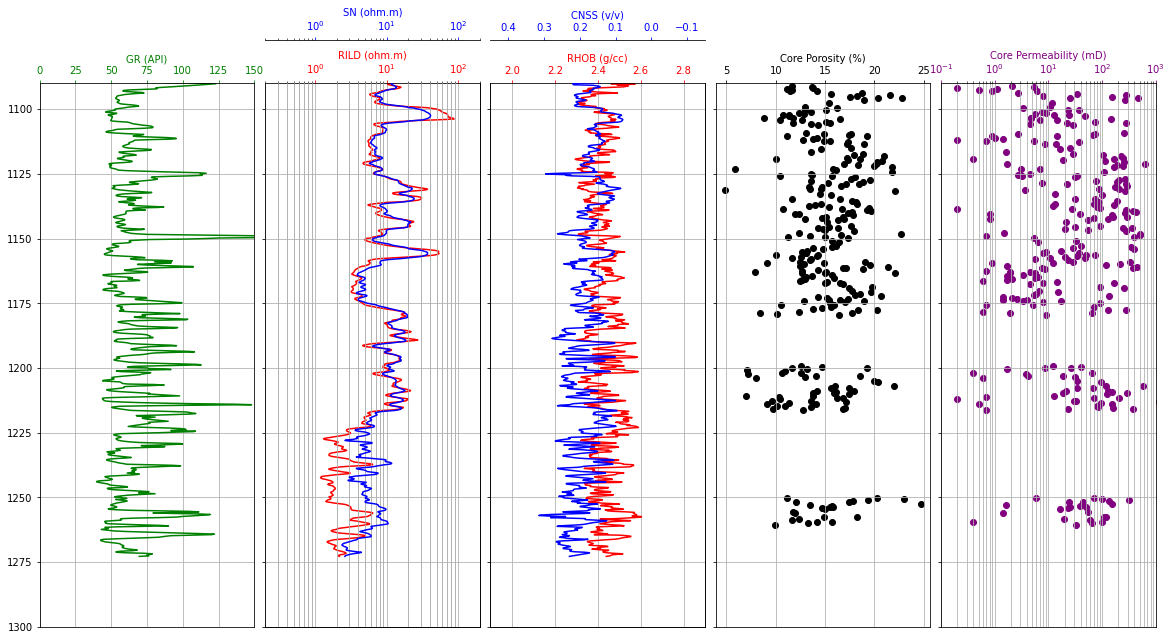

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,10),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro7RO_SER,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("RILD","MD",data=registro7RO_SER,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RILD (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("SN","MD",data=registro7RO_SER,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("SN (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro7RO_SER,color="red")
ax4.set_xlim(1.9,2.9)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro7RO_SER,color="blue")
ax5.set_xlim(0.45,-0.15)
ax5.set_xlabel("CNSS (v/v)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.scatter("Poro_Core_%","MD",data=core_7RO,color="black")
ax6.set_xlabel("Core Porosity (%)",color="black")
ax6.tick_params(axis="x",colors="black")

ax7.scatter("Kh_mD","MD",data=core_7RO,color="purple")
ax7.semilogx()
ax7.set_xlim(0.1,1000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1300,1090)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
corrMatrix = registro7RO_SER.drop(["MD"],1).corr()
corrMatrix

<ipython-input-124-9a0ba0be7765>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  corrMatrix = registro7RO_SER.drop(["MD"],1).corr()


,GR,RHOB,CNSS,RILD,SP,SN
GR,1.000000,0.379792,0.187570,-0.183930,0.530159,-0.181382
RHOB,0.379792,1.000000,-0.310035,-0.030062,0.517912,-0.025422
CNSS,0.187570,-0.310035,1.000000,-0.442844,-0.138690,-0.465450
RILD,-0.183930,-0.030062,-0.442844,1.000000,-0.017697,0.947530
SP,0.530159,0.517912,-0.138690,-0.017697,1.000000,-0.024598
SN,-0.181382,-0.025422,-0.465450,0.947530,-0.024598,1.000000


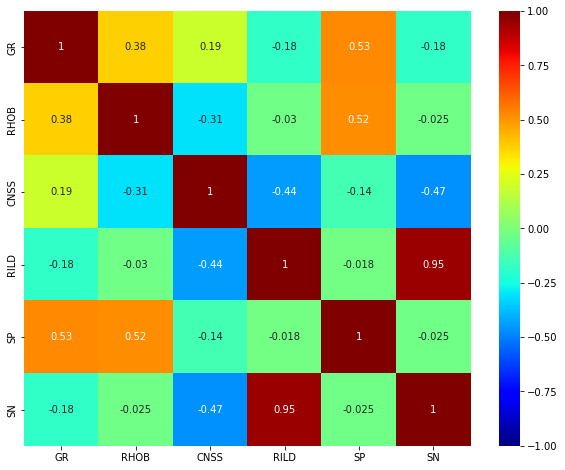

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix,cmap="jet",vmin=-1,vmax=1,annot=True,annot_kws={"fontsize":10})

## 7-BA-405D-BA

In [ ]:
core_7BA = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Petrofisicos/Sergi/7-BA-405D-BA/PETROFISICA7BA0405DBA-7BA405DBA.xls"
core_7BA = pd.read_excel(core_7BA)

In [ ]:
core_7BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SIGLA POCO           16 non-null     object        
 1   PREFIXO              16 non-null     object        
 2   DATA_INICIO POÇO     16 non-null     datetime64[ns]
 3   TIPO AMOSTRA         16 non-null     object        
 4   DIRECAO AMOSTRA      16 non-null     object        
 5   TESTEMUNHO           16 non-null     int64         
 6   PROF.(m)             16 non-null     float64       
 7   POROSIDADE %         16 non-null     float64       
 8    DENSIDADE           16 non-null     float64       
 9   PERMEAB. LONG. (mD)  15 non-null     float64       
 10  PRESSAO CONF. (psi)  16 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 1.5+ KB


In [ ]:
core_7BA = core_7BA.drop(["SIGLA POCO", "PREFIXO", "DATA_INICIO POÇO", "TIPO AMOSTRA", "TESTEMUNHO","PRESSAO CONF. (psi)"],axis=1)
core_7BA = core_7BA.rename(columns={"PROF.(m)":columnas[0],"POROSIDADE %":columnas[1]," DENSIDADE":columnas[2],"PERMEAB. LONG. (mD)":columnas[3]})

In [ ]:
core_7BA_V = core_7BA[core_7BA["DIRECAO AMOSTRA"]=="IV1"]
core_7BA = core_7BA[core_7BA["DIRECAO AMOSTRA"]=="IH1"]

In [ ]:
core_7BA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 15
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    14 non-null     object 
 1   MD                 14 non-null     float64
 2   Poro_Core_%        14 non-null     float64
 3   Gran_Density_g/cc  14 non-null     float64
 4   Kh_mD              13 non-null     float64
dtypes: float64(4), object(1)
memory usage: 672.0+ bytes


In [ ]:
core_7BA.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,14.000000,14.000000,14.000000,13.000000
mean,580.167857,14.685714,2.627143,10.369231
std,1.955230,4.144107,0.029202,6.636689
min,576.750000,6.000000,2.580000,0.700000
25%,579.125000,12.150000,2.610000,7.300000
50%,580.475000,15.100000,2.625000,11.400000
75%,581.675000,18.050000,2.650000,13.500000
max,582.900000,20.500000,2.670000,21.300000


In [ ]:
core_7BA = core_7BA.sort_values(by=["MD"])

In [ ]:
core_7BA["LogKh_mD"] = np.log10(core_7BA["Kh_mD"])

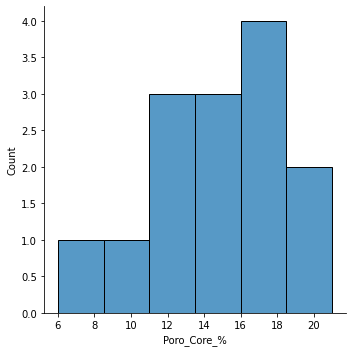

In [ ]:
sns.displot(core_7BA['Poro_Core_%'],binwidth=2.5);

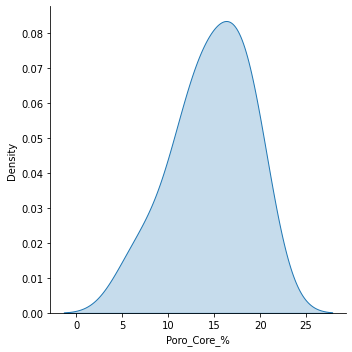

In [ ]:
sns.displot(core_7BA['Poro_Core_%'],kind="kde",fill=True);

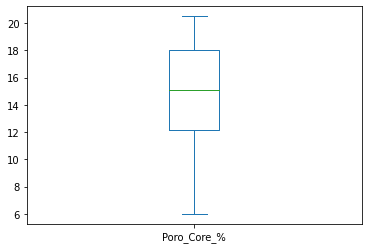

In [ ]:
core_7BA["Poro_Core_%"].plot(kind="box");

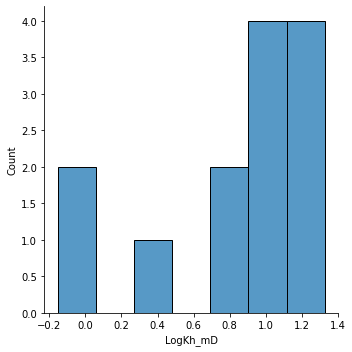

In [ ]:
sns.displot(core_7BA['LogKh_mD']);

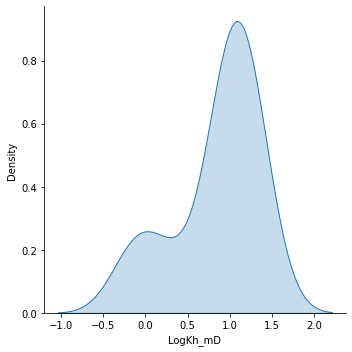

In [ ]:
sns.displot(core_7BA['LogKh_mD'],kind="kde",fill=True);

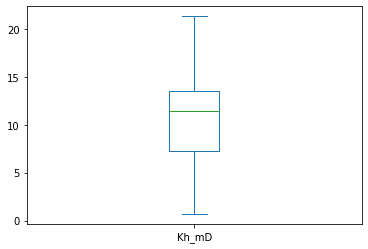

In [ ]:
core_7BA["Kh_mD"].plot(kind="box");

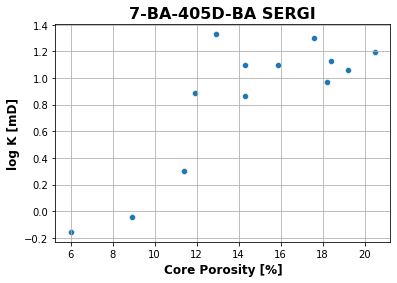

In [ ]:
p = sns.scatterplot(x=core_7BA['Poro_Core_%'],y=core_7BA['LogKh_mD'])
p.set_title("7-BA-405D-BA SERGI",fontsize=16, fontweight="bold")
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.grid();

**REGISTROS**

In [ ]:
registro7BA = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-BA-405D-BA/7-BA-405D-BA Log.xlsx"
registro7BA = pd.read_excel(registro7BA)

In [ ]:
registro7BA.describe()

,MD,GR,HT90,HT60,HT40,HT30,RHOB,NPHI,BS,CALI
count,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,687.849985,59.837133,81.633520,100.207905,3467.222597,3574.872093,0.843183,-1.144437,7.326271,7.537062
std,102.205432,46.843086,1082.792619,1115.105493,7561.321302,7700.201771,37.617908,37.543166,37.861545,37.871083
min,510.899983,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,599.374984,43.011269,4.467468,4.459523,4.452543,4.422496,2.180479,0.183890,8.750000,8.782442
50%,687.849985,58.651726,6.580936,6.557441,6.517754,6.523843,2.262008,0.227401,8.750000,8.899174
75%,776.324986,76.794662,16.795990,16.512709,18.171538,19.323447,2.339224,0.275759,8.750000,9.132635
max,864.799988,215.056335,20000.000000,20000.000000,20000.000000,54347.855469,2.879092,1.105373,8.750000,11.467256


In [ ]:
registro_7BA = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Well Logs/Sergi Fm/7-BA-405D-BA"
registro_7BA = np.loadtxt(registro_7BA,skiprows=36)
registro_7BA[registro_7BA==-999.25]=np.nan

In [ ]:
registro_7BA = pd.DataFrame(registro_7BA,columns=mnemocis)

In [ ]:
not_NaN = registro_7BA['GR'].notnull().values
registro_7BA = registro_7BA[not_NaN]

In [ ]:
registro_7BA.describe()

,DEPTH,DTCO,GR,IA,NPHI,PEF,Vsh,RHOB,RT,Vp
count,1775.000000,1773.000000,1775.000000,0.0,1775.000000,1773.000000,1775.000000,1775.000000,1775.000000,0.0
mean,708.224007,78.934980,62.300189,NaN,0.211741,2.581469,0.311501,2.280349,9.636234,NaN
std,78.241006,2.070995,19.095009,NaN,0.055418,0.281931,0.095475,0.100913,12.412356,NaN
min,572.871600,73.785706,26.393730,NaN,0.065017,2.184469,0.131969,1.799346,0.001000,NaN
25%,640.461000,77.484619,47.958410,NaN,0.174989,2.385121,0.239792,2.208499,4.436576,NaN
50%,708.355200,79.160164,60.479469,NaN,0.207488,2.513315,0.302397,2.274625,5.951345,NaN
75%,775.944600,80.687279,72.929863,NaN,0.242585,2.717708,0.364649,2.353068,9.727125,NaN
max,843.534000,82.426712,174.825104,NaN,0.514202,5.112362,0.874126,2.596203,121.227699,NaN


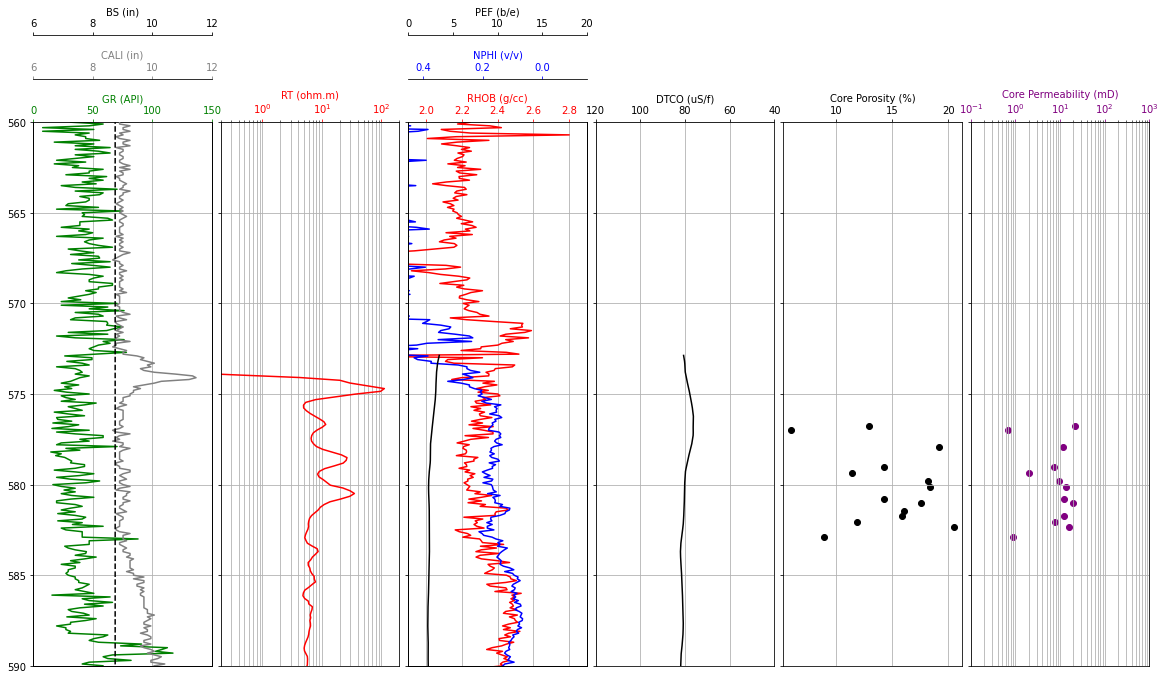

In [ ]:
fig, axes = plt.subplots(figsize=(20,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro7BA,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro7BA,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro7BA,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RT","DEPTH",data=registro_7BA,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RT (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax8.plot("RHOB","MD",data=registro7BA,color="red")
ax8.set_xlim(1.9,2.9)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro7BA,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PEF","DEPTH",data=registro_7BA,linestyle="-",color="black")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEF (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.plot("DTCO","DEPTH",data=registro_7BA,linestyle="-",color="black")
ax11.set_xlim(120,40)
ax11.set_xlabel("DTCO (uS/f)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core_%","MD",data=core_7BA,color="black")
ax12.set_xlabel("Core Porosity (%)",color="black")
ax12.tick_params(axis="x",colors="black")

ax13.scatter("Kh_mD","MD",data=core_7BA,color="purple")
ax13.semilogx()
ax13.set_xlim(0.1,1000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(590,560)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==5:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==6:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##3-BRSA-1177D-BA

In [ ]:
core_3BRSA = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/3-BRSA-1177D-BA/3BRSA1177DBAPetrofisicabasica.xlsx"
core_3BRSA = pd.read_excel(core_3BRSA)

In [ ]:
core_3BRSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sigla ANP            7 non-null      object 
 1   Nome BR              7 non-null      object 
 2   Tipo da amostra      7 non-null      object 
 3   Direção Amostra      7 non-null      object 
 4   Número do testo      0 non-null      float64
 5   Profundidade         7 non-null      float64
 6   Porosidade %         7 non-null      float64
 7   Densidade            7 non-null      float64
 8   Permeab. Long. (mD)  7 non-null      float64
 9   Pressão Conf. (psi)  5 non-null      float64
dtypes: float64(6), object(4)
memory usage: 688.0+ bytes


In [ ]:
core_3BRSA = core_3BRSA.drop(["Sigla ANP","Nome BR","Tipo da amostra","Número do testo","Pressão Conf. (psi)"],axis=1)
core_3BRSA = core_3BRSA.rename(columns={"Profundidade":columnas[0],"Porosidade %":columnas[1],"Densidade":columnas[2],"Permeab. Long. (mD)":columnas[3]})

In [ ]:
core_3BRSA.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,7.000000,7.000000,7.000000,7.000000
mean,2663.600000,15.371429,2.645714,816.628571
std,25.909522,6.282440,0.025728,1814.066024
min,2634.800000,12.100000,2.600000,0.600000
25%,2639.250000,12.350000,2.635000,2.150000
50%,2670.600000,13.300000,2.650000,10.500000
75%,2682.750000,14.000000,2.660000,396.150000
max,2695.800000,29.500000,2.680000,4908.700000


In [ ]:
core_3BRSA = core_3BRSA.sort_values(by=["MD"])

In [ ]:
core_3BRSA["LogKh_mD"] = np.log10(core_3BRSA["Kh_mD"])

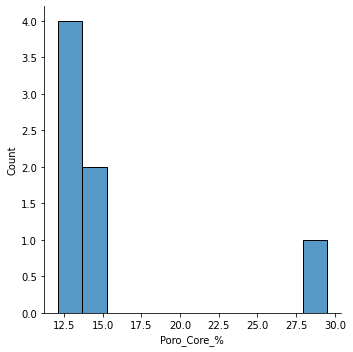

In [ ]:
sns.displot(core_3BRSA['Poro_Core_%']);

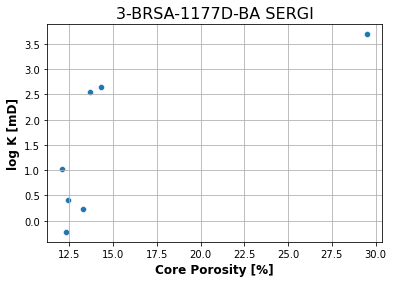

In [ ]:
p = sns.scatterplot(x=core_3BRSA['Poro_Core_%'],y=core_3BRSA['LogKh_mD'])
p.set_title("3-BRSA-1177D-BA SERGI",fontsize=16)
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.grid();

**REGISTROS**

In [ ]:
registro3BRSA = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/3-BRSA-1177D-BA/3-BRSA-1177D-BA Log.xlsx"
registro3BRSA = pd.read_excel(registro3BRSA)
registro3BRSA["NPHI"]=registro3BRSA["NPHI"]/100

In [ ]:
registro3BRSA.describe()

,MD,GR,BS,CALI,HDRS,RHOB,NPHI,DT,PE,HMRS
count,9760.000000,9628.000000,9159.0,9092.000000,9159.000000,9088.000000,9059.000000,9143.000000,9088.000000,9159.000000
mean,2257.949895,70.442985,8.5,8.972950,9.663243,2.514501,0.149170,77.703165,3.239553,4.578318
std,281.761369,31.261073,0.0,0.327354,96.904679,0.095348,0.075922,8.487087,1.192444,3.745690
min,1769.999888,16.121901,8.5,8.571000,0.614100,1.854800,0.012097,53.797401,1.945500,0.668900
25%,2013.974891,42.204376,8.5,8.803200,2.078700,2.438375,0.087827,72.265202,2.417500,2.346050
50%,2257.949895,65.232903,8.5,8.903000,3.281000,2.536600,0.113925,75.087502,2.874400,3.393700
75%,2501.924899,95.945549,8.5,9.074925,5.453950,2.589900,0.224448,82.877602,3.931000,5.339750
max,2745.899902,359.505005,8.5,12.233800,1999.999878,2.725200,0.356817,107.750900,13.416700,57.583500


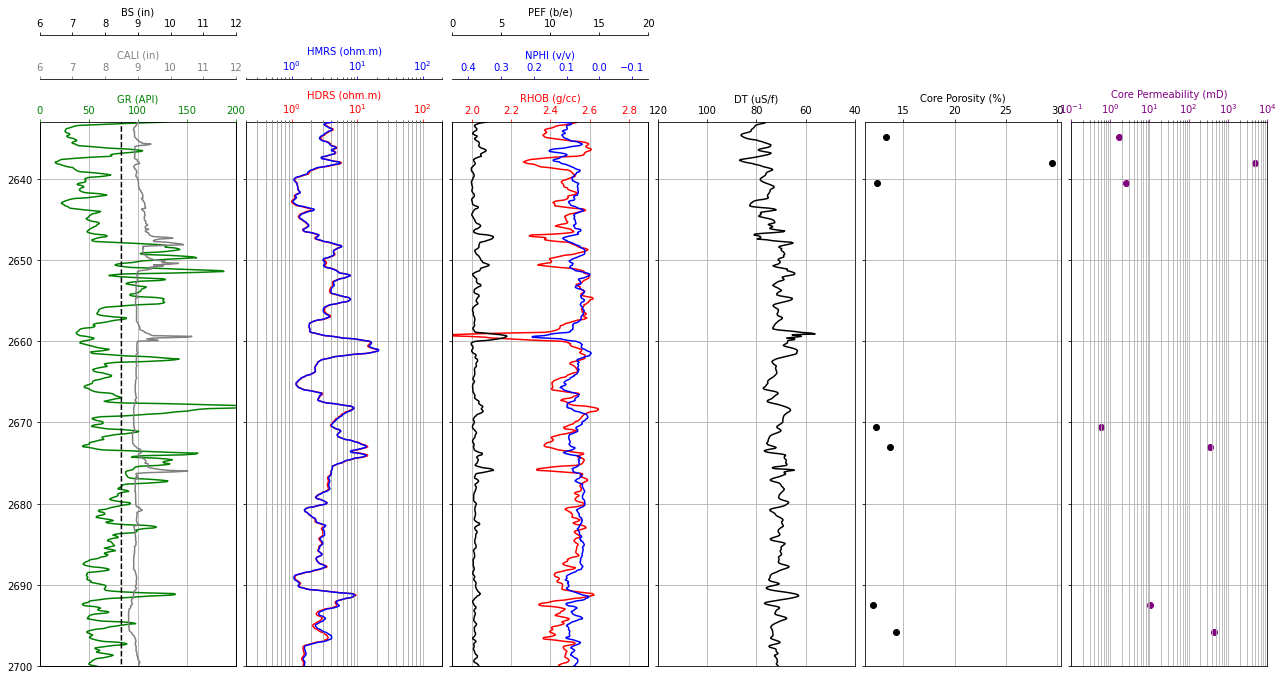

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro3BRSA,color="green")
ax1.set_xlim(0,200)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro3BRSA,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro3BRSA,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("HDRS","MD",data=registro3BRSA,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("HDRS (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("HMRS","MD",data=registro3BRSA,color="blue")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.grid(which="minor")
ax5.set_xlabel("HMRS (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax8.plot("RHOB","MD",data=registro3BRSA,color="red")
ax8.set_xlim(1.9,2.9)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro3BRSA,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PE","MD",data=registro3BRSA,linestyle="-",color="black")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEF (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.plot("DT","MD",data=registro3BRSA,linestyle="-",color="black")
ax11.set_xlim(120,40)
ax11.set_xlabel("DT (uS/f)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core_%","MD",data=core_3BRSA,color="black")
ax12.set_xlabel("Core Porosity (%)",color="black")
ax12.tick_params(axis="x",colors="black")

ax13.scatter("Kh_mD","MD",data=core_3BRSA,color="purple")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(2700,2633)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==6 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==7:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##6-BRSA-1225D-BA

In [ ]:
core_6BRSA = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/6-BRSA-1225D-BA/15-012261__PetrofisicaBasica_6-BRSA-1225D-BA.xlsx"
core_6BRSA = pd.read_excel(core_6BRSA)

In [ ]:
core_6BRSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poço  ANP            13 non-null     object 
 1   Poço Petrobras       13 non-null     object 
 2   Tipo da amostra      13 non-null     object 
 3   Direção Amostra      13 non-null     object 
 4   Número do testo      13 non-null     object 
 5   Profundidade         13 non-null     float64
 6   Porosidade %         13 non-null     float64
 7   Densidade            13 non-null     float64
 8   Permeab. Long. (mD)  11 non-null     float64
 9   Pressão Conf. (psi)  13 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.1+ KB


In [ ]:
core_6BRSA = core_6BRSA.drop(["Poço  ANP","Poço Petrobras","Tipo da amostra","Número do testo","Pressão Conf. (psi)","Direção Amostra"],axis=1)
core_6BRSA = core_6BRSA.rename(columns={"Profundidade":columnas[0],"Porosidade %":columnas[1],"Densidade":columnas[2],"Permeab. Long. (mD)":columnas[3]})

In [ ]:
core_6BRSA.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,13.000000,13.000000,13.000000,11.000000
mean,3468.323077,9.400000,2.656923,1.930000
std,187.654994,5.653612,0.021750,3.263458
min,3197.700000,0.600000,2.640000,0.010000
25%,3350.500000,6.100000,2.640000,0.045000
50%,3437.000000,7.800000,2.650000,0.240000
75%,3695.800000,11.800000,2.660000,1.825000
max,3726.000000,18.700000,2.720000,8.850000


In [ ]:
core_6BRSA = core_6BRSA.sort_values(by=["MD"])

In [ ]:
core_6BRSA = core_6BRSA[(3333<=core_6BRSA["MD"]) & (core_6BRSA["MD"]<=3594)]

In [ ]:
core_6BRSA.describe()

,MD,Poro_Core_%,Gran_Density_g/cc,Kh_mD
count,7.000000,7.000000,7.000000,5.00000
mean,3405.057143,10.628571,2.645714,2.63800
std,56.287768,5.550590,0.005345,3.58329
min,3341.000000,5.900000,2.640000,0.24000
25%,3360.750000,6.250000,2.640000,0.45000
50%,3397.800000,7.800000,2.650000,1.15000
75%,3439.300000,14.900000,2.650000,2.50000
max,3496.500000,18.400000,2.650000,8.85000


In [ ]:
core_6BRSA["LogKh_mD"] = np.log10(core_6BRSA["Kh_mD"])

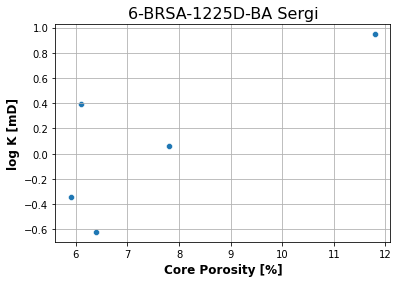

In [ ]:
p = sns.scatterplot(x=core_6BRSA['Poro_Core_%'],y=core_6BRSA['LogKh_mD'])
p.set_title("6-BRSA-1225D-BA Sergi",fontsize=16)
p.set_xlabel("Core Porosity [%]", fontsize=12, fontweight="bold")
p.set_ylabel("log K [mD]", fontsize=12,fontweight="bold")
p.grid();

**REGISTROS**

In [ ]:
registro6BRSA = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/6-BRSA-1225D-BA/6-BRSA-1225D-BA Log.xlsx"
registro6BRSA = pd.read_excel(registro6BRSA)

In [ ]:
registro6BRSA.describe()

,MD,GR,BS,CALI,RT90,RT60,RT30,NPHI,DT,PE,RHOB
count,2610.000000,2610.000000,2610.0,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,3463.549994,67.616511,8.5,8.655267,12.861998,12.868760,12.840620,0.042965,65.089962,2.908706,2.569836
std,75.358644,32.863588,0.0,0.214227,17.314693,17.086879,16.506691,0.033860,5.462224,0.600845,0.080790
min,3333.099992,17.043346,8.5,8.227694,0.814645,0.815964,0.859200,-0.010617,52.331375,1.966561,2.356023
25%,3398.324993,44.142497,8.5,8.552719,4.472763,4.520860,4.642300,0.018145,61.121392,2.483196,2.515238
50%,3463.549994,59.060600,8.5,8.605972,7.963787,8.037160,8.207600,0.034375,64.689388,2.753628,2.584843
75%,3528.774995,82.468750,8.5,8.678793,13.874663,13.923102,13.771250,0.062557,68.175972,3.214069,2.631146
max,3593.999996,210.426682,8.5,10.419902,197.719528,186.659164,165.285004,0.221755,80.378922,5.932754,2.748616


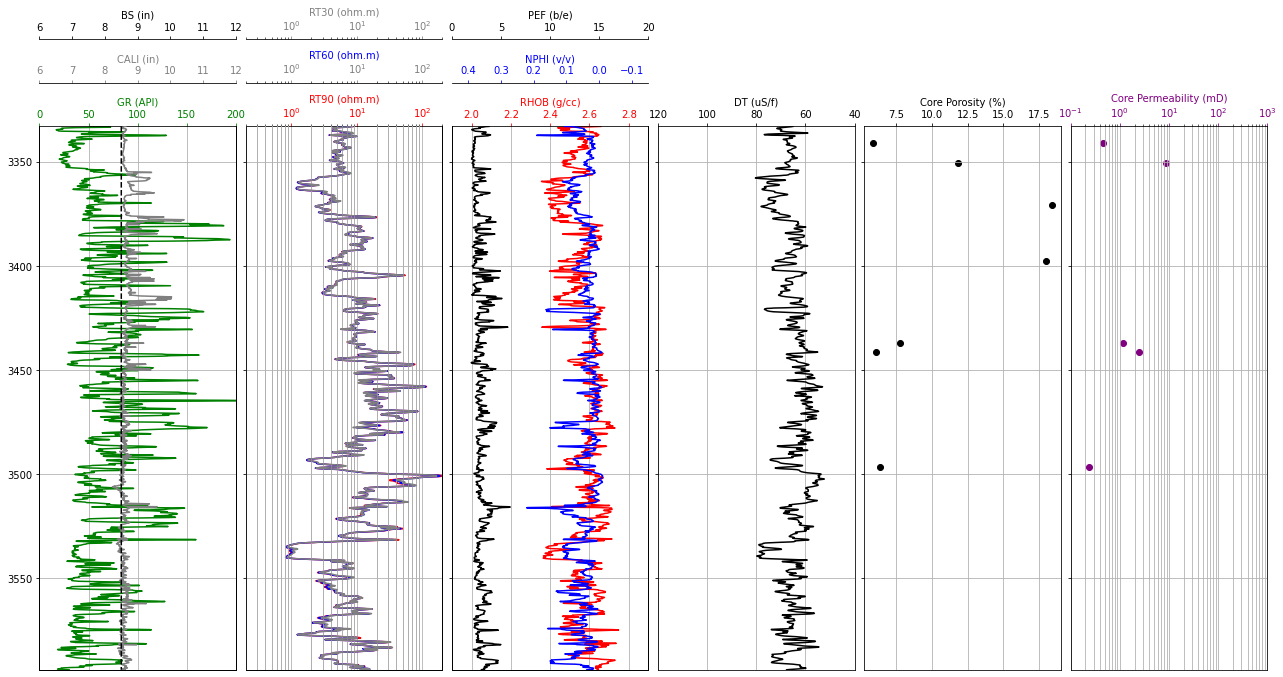

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro6BRSA,color="green")
ax1.set_xlim(0,200)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro6BRSA,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro6BRSA,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RT90","MD",data=registro6BRSA,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RT60","MD",data=registro6BRSA,color="blue")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.grid(which="minor")
ax5.set_xlabel("RT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="gray")

ax6.plot("RT30","MD",data=registro6BRSA,color="gray")
ax6.set_xlim(0.2,200)
ax6.semilogx()
ax6.grid(which="minor")
ax6.set_xlabel("RT30 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro6BRSA,color="red")
ax8.set_xlim(1.9,2.9)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro6BRSA,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PE","MD",data=registro6BRSA,linestyle="-",color="black")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEF (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.plot("DT","MD",data=registro6BRSA,linestyle="-",color="black")
ax11.set_xlim(120,40)
ax11.set_xlabel("DT (uS/f)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core_%","MD",data=core_6BRSA,color="black")
ax12.set_xlabel("Core Porosity (%)",color="black")
ax12.tick_params(axis="x",colors="black")

ax13.scatter("Kh_mD","MD",data=core_6BRSA,color="purple")
ax13.semilogx()
ax13.set_xlim(0.1,1000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(3594,3333)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==7 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==8 or i==5:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

#Integrado

##ScatterPlot

In [ ]:
# Candeias = pd.concat([core_7CX,core_1ALV])
# Candeias = Candeias.drop(columns=["MD","LogKh_mD"])
# Candeias["LogKh_mD"] = np.log10(Candeias["Kh_mD"]);

In [ ]:
AguaGrande = pd.concat([core_7JND,core_13JND])
AguaGrande = AguaGrande.drop(columns=["MD"])

In [ ]:
AguaGrande.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    115 non-null    object 
 1   Poro_Core_%        115 non-null    float64
 2   Gran_Density_g/cc  115 non-null    float64
 3   Kh_mD              115 non-null    float64
 4   LogKh_mD           115 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.4+ KB


In [ ]:
not_Nan = AguaGrande["Kh_mD"].notnull().values
AguaGrande = AguaGrande[not_Nan]
not_Nan = AguaGrande["Poro_Core_%"].notnull().values
AguaGrande = AguaGrande[not_Nan]

In [ ]:
# Sergi = pd.concat([core_7RO,core_7BA,core_3BRSA,core_6BRSA])
# Sergi = Sergi.drop(columns=["MD"])

<ipython-input-176-823f16c5c62f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1).grid()
<ipython-input-176-823f16c5c62f>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1).set_title("Pojuca",fontsize=16)
<ipython-input-176-823f16c5c62f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new

Text(0, 0.5, 'log K [mD]')

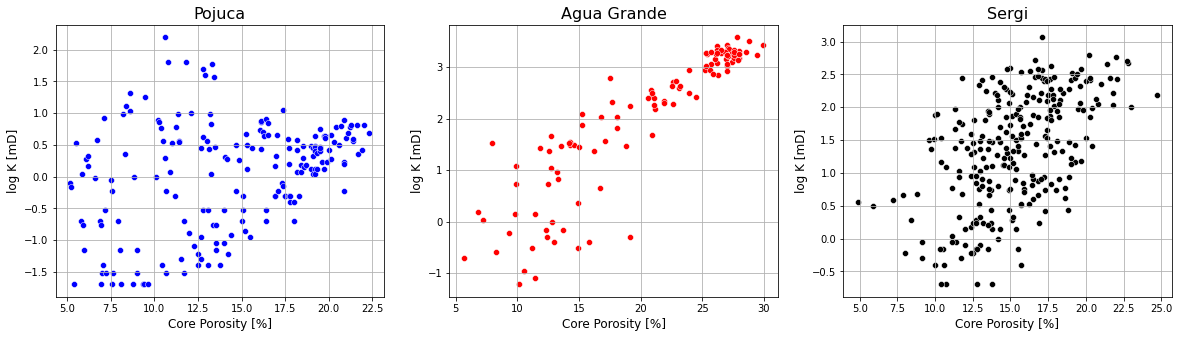

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(x=core_POJ['Poro_Core_%'],y=core_POJ['LogKh_mD'],color="blue")
plt.subplot(1,3,1).grid()
plt.subplot(1,3,1).set_title("Pojuca",fontsize=16)
plt.subplot(1,3,1).set_xlabel("Core Porosity [%]", fontsize=12)
plt.subplot(1,3,1).set_ylabel("log K [mD]", fontsize=12)

plt.subplot(1,3,2)
sns.scatterplot(x=AguaGrande['Poro_Core_%'],y=AguaGrande['LogKh_mD'],color="red")
plt.subplot(1,3,2).grid()
plt.subplot(1,3,2).set_title("Agua Grande",fontsize=16)
plt.subplot(1,3,2).set_xlabel("Core Porosity [%]", fontsize=12)
plt.subplot(1,3,2).set_ylabel("log K [mD]", fontsize=12)
# plt.subplot(1,3,2).set_ylim(-4,4)
# plt.subplot(1,3,2).set_xlim(0,30)

plt.subplot(1,3,3)
sns.scatterplot(x=core_7RO['Poro_Core_%'],y=core_7RO['LogKh_mD'],color="black")
plt.subplot(1,3,3).grid()
plt.subplot(1,3,3).set_title("Sergi",fontsize=16)
plt.subplot(1,3,3).set_xlabel("Core Porosity [%]", fontsize=12)
plt.subplot(1,3,3).set_ylabel("log K [mD]", fontsize=12)
# plt.subplot(1,3,3).set_ylim(-4,4)
# plt.subplot(1,3,3).set_xlim(0,30);

In [ ]:
X = AguaGrande["Poro_Core_%"].values.reshape(-1,1)
y = AguaGrande["LogKh_mD"].values.reshape(-1,1)

In [ ]:
linearRegression=linear_model.LinearRegression()

In [ ]:
linearRegression.fit(X,y)
y_pred=linearRegression.predict(X)

In [ ]:
print('Slope: %.3f'%linearRegression.coef_[0])
print('Intercept: %.3f'%linearRegression.intercept_)

Slope: 0.179
Intercept: -1.607


In [ ]:
error=mean_squared_error(y,y_pred)
print('Error: %.3f'%error)

Error: 0.332


In [ ]:
var=r2_score(y,y_pred)
print('R2: %.3f'%var)

R2: 0.812


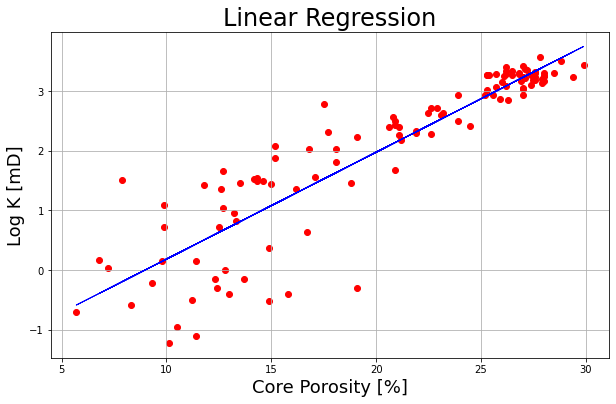

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color="red")
plt.plot(X,y_pred,color="blue",linewidth=1)
plt.xlabel("Core Porosity [%]",fontsize=18)
plt.ylabel("Log K [mD]",fontsize=18)
plt.title('Linear Regression',fontsize=24)
plt.grid()
plt.show()

#DATA

In [ ]:
# from google.colab import files
# core_POJ.to_excel("Core Final 7-MGP-40D-BA POJ.xlsx",index=False)
# files.download("Core Final 7-MGP-40D-BA POJ.xlsx")

In [ ]:
# from google.colab import files
# core_7JND.to_excel("Core Final 7-JND-3D-BA AG.xlsx",index=False)
# files.download("Core Final 7-JND-3D-BA AG.xlsx")

In [ ]:
# from google.colab import files
# core_13JND.to_excel("Core Final 7-JND-13D-BA AG.xlsx",index=False)
# files.download("Core Final 7-JND-13D-BA AG.xlsx")

In [ ]:
# from google.colab import files
# core_7RO.to_excel("Core Final 7-RO-14-BA SER.xlsx",index=False)
# files.download("Core Final 7-RO-14-BA SER.xlsx")

In [ ]:
# from google.colab import files
# registro7RO_SER.to_excel("7-RO-14-BA SER LOG.xlsx",index=False)
# files.download("7-RO-14-BA SER LOG.xlsx")